In [8]:
%run IDM_helper_functions.ipynb

## Simulate from IDM5 and fit with DDM

In [3]:
n_trials = 1000
sim_num = 100

prior_IDM = utils.BoxUniform(low=[0,0.15,0.2,0.05, 52000, 8200], high=[1,0.15,0.5,0.05, 53000, 8600])
param_IDM = prior_IDM.sample((sim_num,))

x = simul_IDM_EM6(param_IDM)
x[:,1]

sim0


tensor([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,   1., 100.,
          1.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1., 100.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,
          1.,   1.,   1., 100., 100.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,   1., 100.,   0.,   1.,
          1.,   1., 100.,   1.,   1.,   1., 100.,   1.,   1.,   1., 100.,   1.,
          1., 100.,   1.,   1.])

In [193]:
x.mean(axis = 0)

tensor([1.0886, 3.7300])

In [57]:
simul_IDM_EM6(param_IDM, Bns = 0, Bs = 2500).mean(axis = 0)

sim0


tensor([0.4151, 0.9300])

In [4]:
n_trials = 1000
sim_num = 100

prior_IDM = utils.BoxUniform(low=[0,0.2,0.2,0.05, 52000, 8200], high=[1,0.6,0.5,0.05, 53000, 8600])
param_IDM = prior_IDM.sample((sim_num,))

par_fitted = np.zeros((sim_num,3))

In [5]:
for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_EM6(np.tile(param_IDM[i,:], (n_trials,1))) # simulate IDM data
    print(param_IDM[i,:])
    print(IDM_o.mean(axis = 0))
    
    #Remove trials that is longer than 3s or undecided
    IDM_o = np.array(IDM_o[:,:])
    IDM_o = IDM_o[IDM_o[:,0]<=3,:]
    IDM_o = IDM_o[IDM_o[:,1]!=100,:]
    
    samp = Sample.from_numpy_array(IDM_o, column_names = [])
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.2, maxval=2)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                      dx=.001, dt=.001, T_dur=3)
                      #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(param_IDM[i,:])
    print(par_fitted[i,:])

0
sim0
tensor([3.0422e-01, 2.1498e-01, 3.2777e-01, 5.0000e-02, 5.2513e+04, 8.4155e+03])
tensor([0.6708, 0.8060])


Info: Params [1.30470823 0.56503049 0.40681231] gave 23.384430598640535


tensor([3.0422e-01, 2.1498e-01, 3.2777e-01, 5.0000e-02, 5.2513e+04, 8.4155e+03])
[1.30470823 0.56503049 0.40681231]
1
sim0
tensor([7.7133e-01, 5.5884e-01, 4.2844e-01, 5.0000e-02, 5.2855e+04, 8.4614e+03])
tensor([0.5342, 0.9570])


Info: Params [3.84682695 0.42403054 0.433427  ] gave -2672.15911394188


tensor([7.7133e-01, 5.5884e-01, 4.2844e-01, 5.0000e-02, 5.2855e+04, 8.4614e+03])
[3.84682695 0.42403054 0.433427  ]
2
sim0
tensor([7.7101e-01, 4.6554e-01, 4.7824e-01, 5.0000e-02, 5.2219e+04, 8.2069e+03])
tensor([0.7002, 0.9880])


Info: Params [3.12195404 0.68131474 0.48727431] gave -1456.7752340041004


tensor([7.7101e-01, 4.6554e-01, 4.7824e-01, 5.0000e-02, 5.2219e+04, 8.2069e+03])
[3.12195404 0.68131474 0.48727431]
3
sim0
tensor([1.2820e-01, 2.6185e-01, 2.5922e-01, 5.0000e-02, 5.2212e+04, 8.3026e+03])
tensor([0.8090, 0.6790])


Info: Params [0.52878108 0.7150953  0.31912052] gave 1555.8044216336189


tensor([1.2820e-01, 2.6185e-01, 2.5922e-01, 5.0000e-02, 5.2212e+04, 8.3026e+03])
[0.52878108 0.7150953  0.31912052]
4
sim0
tensor([5.6562e-01, 4.9889e-01, 4.7182e-01, 5.0000e-02, 5.2853e+04, 8.3443e+03])
tensor([0.6300, 0.8860])


Info: Params [2.4112079  0.4378719  0.49091632] gave -1556.8756207454128


tensor([5.6562e-01, 4.9889e-01, 4.7182e-01, 5.0000e-02, 5.2853e+04, 8.3443e+03])
[2.4112079  0.4378719  0.49091632]
5
sim0


KeyboardInterrupt: 

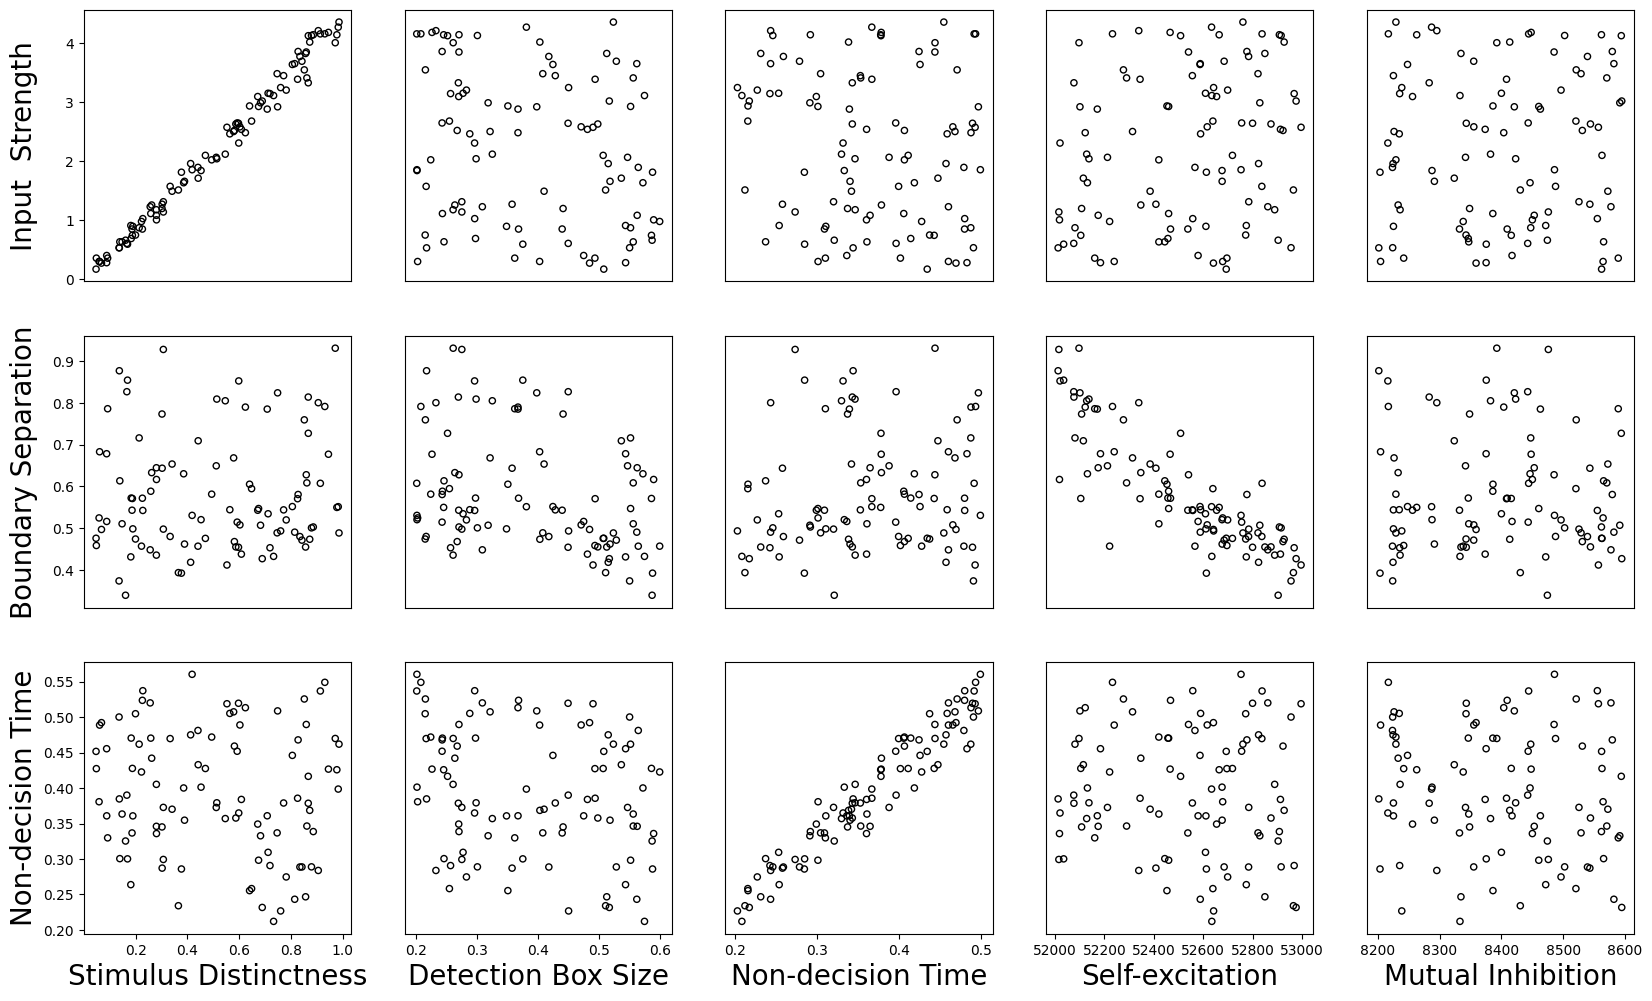

In [69]:
# bns 1500 bs 500
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time", "Self-excitation", "Mutual Inhibition"]
par_fitted_labels = ["Input  Strength","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(np.delete(arr=param_IDM, obj = 3, axis = 1), par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(20,12))

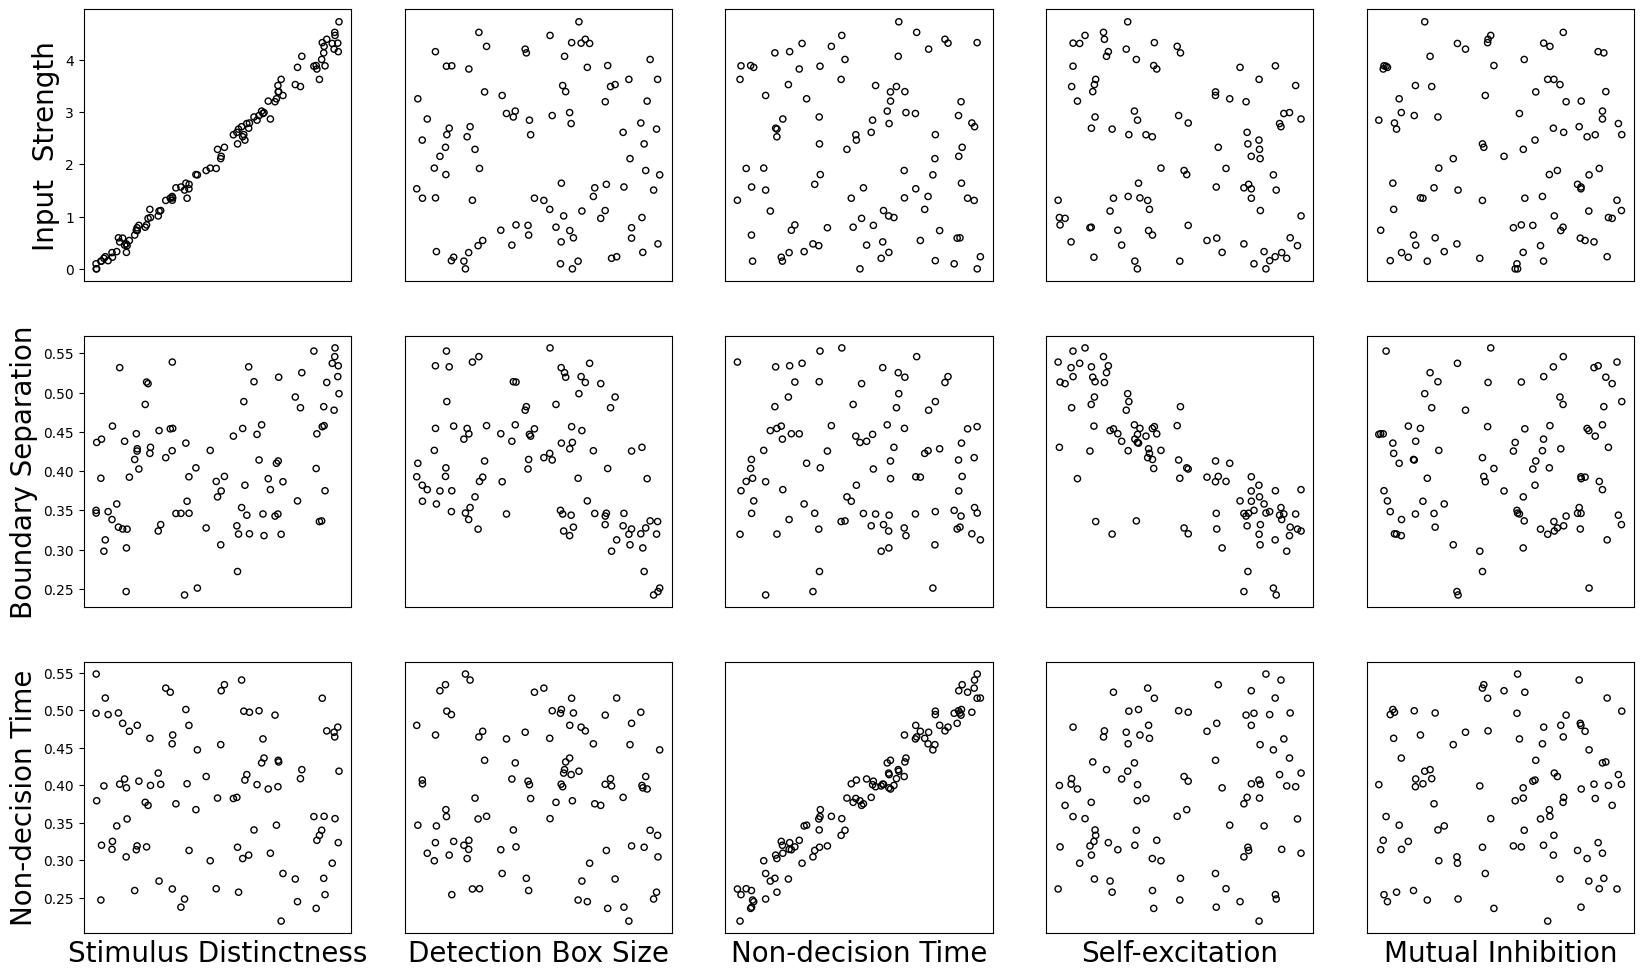

In [10]:
# bns 2000 bs 500
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time", "Self-excitation", "Mutual Inhibition"]
par_fitted_labels = ["Input  Strength","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(np.delete(arr=param_IDM, obj = 3, axis = 1), par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(20,12))

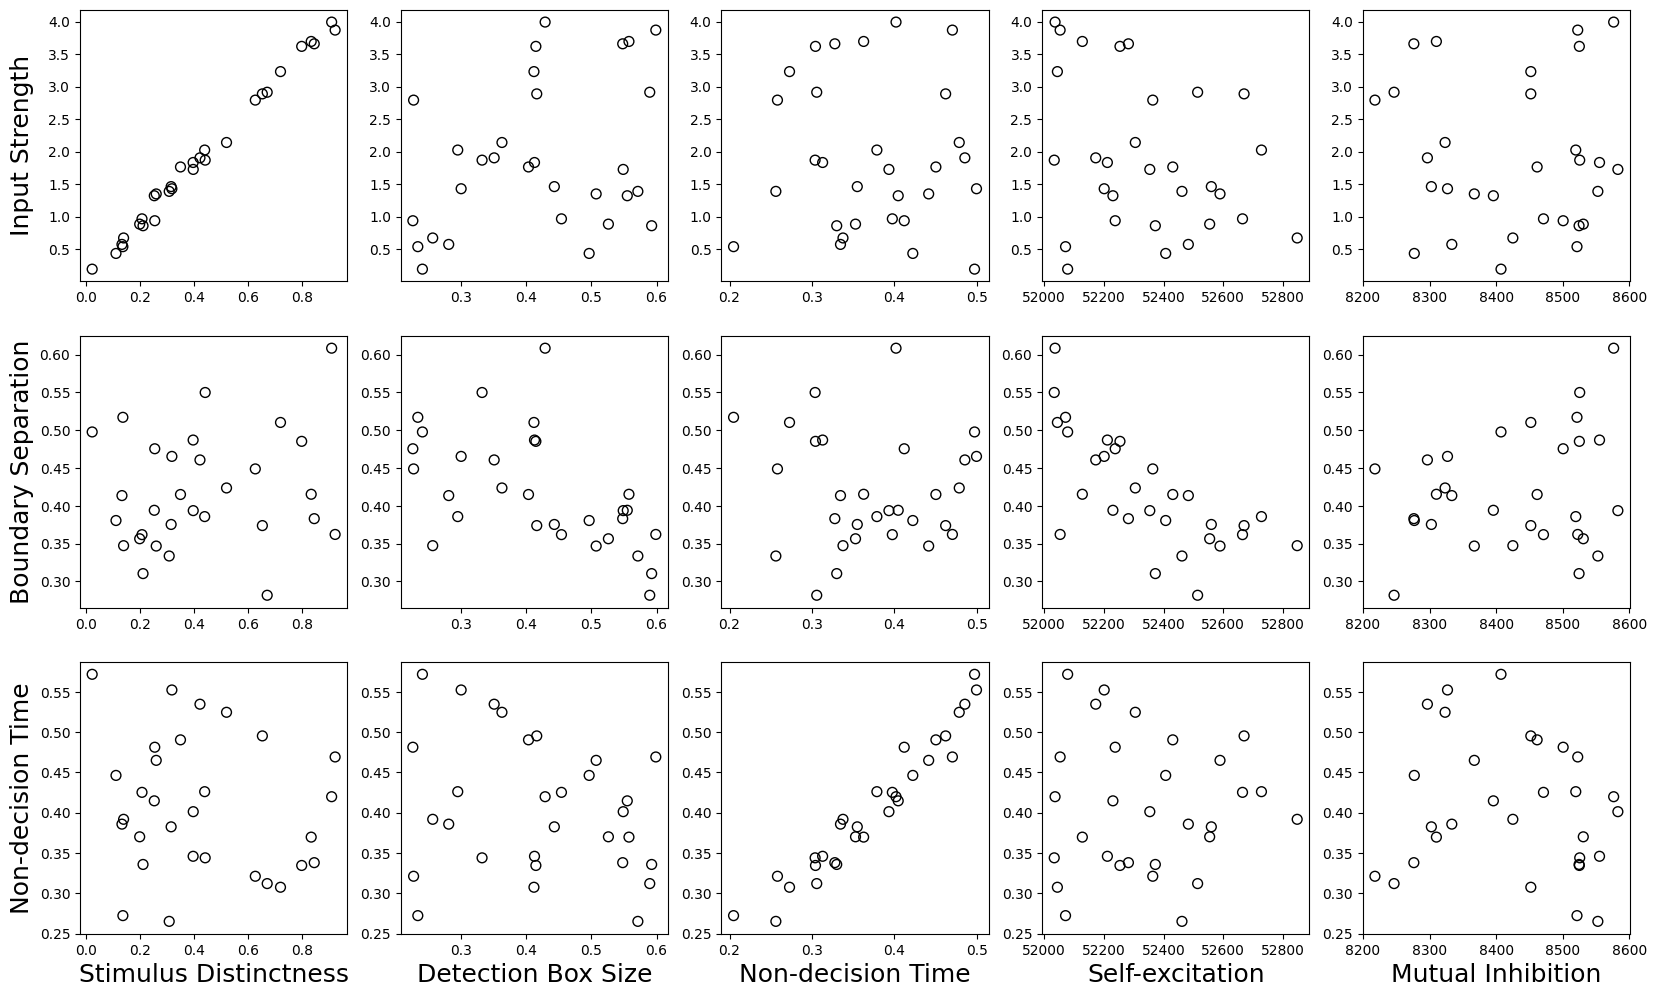

In [151]:
# bns 2000 bs 500
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time", "Self-excitation", "Mutual Inhibition"]
par_fitted_labels = ["Input Strength","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(np.delete(arr=param_IDM, obj = 3, axis = 1), par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 10, s = 50, figsize=(20,12))

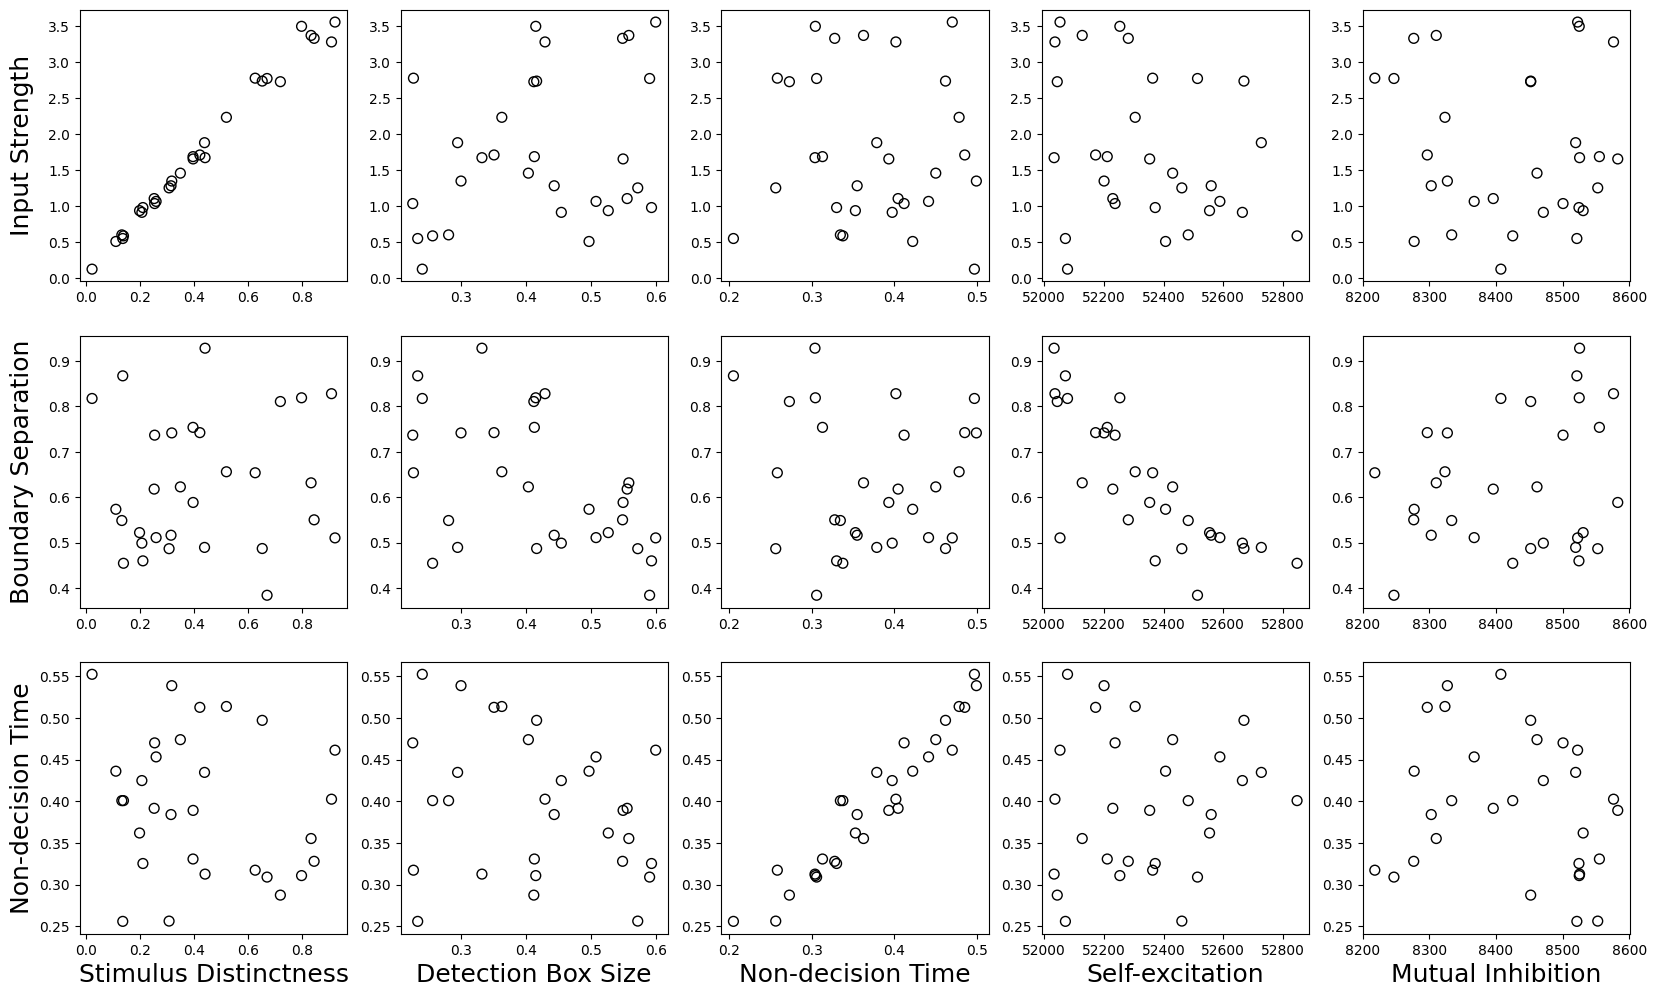

In [154]:
# bns 2500 bs 500
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time", "Self-excitation", "Mutual Inhibition"]
par_fitted_labels = ["Input Strength","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(np.delete(arr=param_IDM, obj = 3, axis = 1), par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 50, figsize=(20,12))

## Simulate from IDM3 and fit with DDM

In [10]:
n_trials = 1000
sim_num = 100

prior_IDM = utils.BoxUniform(low=[0,0.2,0.2,0.05, 52500, 8400], high=[1,0.6,0.5,0.05, 52500, 8400])
param_IDM = prior_IDM.sample((sim_num,))

par_fitted = np.zeros((sim_num,3))
valid_trials = []
choice_prop = []

In [11]:
for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_EM6(np.tile(param_IDM[i,:], (n_trials,1))) # simulate IDM data
    print(param_IDM[i,:])
    print(IDM_o[0:10,:])
    
    #Remove trials that is longer than 3s or undecided
    IDM_o = np.array(IDM_o[:,:])
    IDM_o = IDM_o[IDM_o[:,0]<=3,:]
    IDM_o = IDM_o[IDM_o[:,0]>=0.2,:]
    IDM_o = IDM_o[IDM_o[:,1]!=100,:]
    valid_trials.append(IDM_o.shape[0])
    choice_prop.append(IDM_o.mean(axis=0)[1])

    samp = Sample.from_numpy_array(IDM_o, column_names = [])
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.2, maxval=2)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                      dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(param_IDM[i,:])
    print(par_fitted[i,:])

0
sim0
tensor([4.1276e-01, 2.2311e-01, 3.0983e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4228, 1.0000],
        [0.5918, 0.0000],
        [0.4148, 1.0000],
        [0.4498, 1.0000],
        [0.6668, 0.0000],
        [0.5418, 0.0000],
        [0.4778, 1.0000],
        [0.5258, 1.0000],
        [0.4408, 0.0000],
        [0.4598, 1.0000]])


Info: Params [1.63221802 0.42029614 0.37177215] gave -1178.501212771894


tensor([4.1276e-01, 2.2311e-01, 3.0983e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.63221802 0.42029614 0.37177215]
1
sim0
tensor([9.4461e-01, 5.5693e-01, 3.1240e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3784, 0.0000],
        [0.3864, 1.0000],
        [0.3804, 1.0000],
        [0.4924, 1.0000],
        [0.3374, 1.0000],
        [0.3504, 1.0000],
        [0.3514, 1.0000],
        [0.4134, 1.0000],
        [0.3524, 1.0000],
        [0.4004, 1.0000]])


Info: Params [4.17127187 0.34441218 0.32211678] gave -3206.6145954060103


tensor([9.4461e-01, 5.5693e-01, 3.1240e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.17127187 0.34441218 0.32211678]
2
sim0
tensor([2.9594e-01, 2.9967e-01, 4.1693e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5119, 1.0000],
        [0.7219, 1.0000],
        [0.7939, 1.0000],
        [0.5289, 1.0000],
        [0.5439, 1.0000],
        [0.5529, 1.0000],
        [0.4929, 1.0000],
        [0.6079, 1.0000],
        [0.6279, 0.0000],
        [0.6479, 1.0000]])


Info: Params [1.26471684 0.39803513 0.47023272] gave -1082.8060297188179


tensor([2.9594e-01, 2.9967e-01, 4.1693e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.26471684 0.39803513 0.47023272]
3
sim0
tensor([3.9930e-01, 3.3880e-01, 3.5201e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5180, 1.0000],
        [0.4400, 1.0000],
        [0.5240, 1.0000],
        [0.5290, 1.0000],
        [0.5150, 1.0000],
        [0.4550, 1.0000],
        [0.5740, 1.0000],
        [0.5310, 0.0000],
        [0.5380, 1.0000],
        [0.5690, 0.0000]])


Info: Params [1.79422785 0.41058792 0.39036562] gave -1359.7244478297766


tensor([3.9930e-01, 3.3880e-01, 3.5201e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.79422785 0.41058792 0.39036562]
4
sim0
tensor([6.2421e-01, 2.4453e-01, 2.1595e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4579, 1.0000],
        [0.3199, 1.0000],
        [0.3239, 1.0000],
        [0.3629, 1.0000],
        [0.5469, 1.0000],
        [0.4049, 0.0000],
        [0.3219, 1.0000],
        [0.4879, 1.0000],
        [0.3699, 0.0000],
        [0.3659, 1.0000]])


Info: Params [2.71664683 0.41559815 0.27218693] gave -1939.8874507226233


tensor([6.2421e-01, 2.4453e-01, 2.1595e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.71664683 0.41559815 0.27218693]
5
sim0
tensor([2.9085e-01, 4.2046e-01, 4.2454e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5245, 0.0000],
        [0.5315, 0.0000],
        [0.7335, 0.0000],
        [0.5615, 1.0000],
        [0.5905, 1.0000],
        [0.5595, 1.0000],
        [0.5275, 1.0000],
        [0.5105, 1.0000],
        [0.4885, 1.0000],
        [0.5205, 1.0000]])


Info: Params [1.26738811 0.39781421 0.45548149] gave -1069.0918265826053


tensor([2.9085e-01, 4.2046e-01, 4.2454e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.26738811 0.39781421 0.45548149]
6
sim0
tensor([4.0738e-01, 4.8021e-01, 4.4168e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5017, 1.0000],
        [0.5657, 1.0000],
        [0.5997, 1.0000],
        [0.5257, 1.0000],
        [0.5717, 1.0000],
        [0.5367, 1.0000],
        [0.5887, 1.0000],
        [0.7017, 1.0000],
        [0.5787, 1.0000],
        [0.5707, 1.0000]])


Info: Params [1.67448186 0.38810288 0.46531761] gave -1412.2638643818273


tensor([4.0738e-01, 4.8021e-01, 4.4168e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.67448186 0.38810288 0.46531761]
7
sim0
tensor([3.8119e-01, 4.4852e-01, 2.8610e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4261, 0.0000],
        [0.7671, 1.0000],
        [0.4171, 0.0000],
        [0.4821, 1.0000],
        [0.3701, 0.0000],
        [0.4421, 1.0000],
        [0.4911, 1.0000],
        [0.5881, 1.0000],
        [0.3601, 0.0000],
        [0.5011, 1.0000]])


Info: Params [1.71822269 0.39332626 0.31755128] gave -1381.8737596281119


tensor([3.8119e-01, 4.4852e-01, 2.8610e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.71822269 0.39332626 0.31755128]
8
sim0
tensor([1.7087e-01, 5.2308e-01, 4.9299e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6640, 1.0000],
        [0.9610, 1.0000],
        [0.5760, 1.0000],
        [0.8440, 1.0000],
        [0.8550, 1.0000],
        [0.6530, 0.0000],
        [0.5630, 1.0000],
        [0.5770, 1.0000],
        [0.7730, 0.0000],
        [0.5820, 1.0000]])


Info: Params [0.8248168  0.36939596 0.5095221 ] gave -1107.840811182892


tensor([1.7087e-01, 5.2308e-01, 4.9299e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.8248168  0.36939596 0.5095221 ]
9
sim0
tensor([7.1381e-01, 2.5549e-01, 2.2744e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4094, 1.0000],
        [0.4284, 1.0000],
        [0.3694, 0.0000],
        [0.3954, 1.0000],
        [0.3074, 1.0000],
        [0.3264, 1.0000],
        [0.5974, 1.0000],
        [0.3844, 1.0000],
        [0.4094, 1.0000],
        [0.3134, 1.0000]])


Info: Params [3.1981768  0.44576097 0.27711462] gave -2196.556599518305


tensor([7.1381e-01, 2.5549e-01, 2.2744e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.1981768  0.44576097 0.27711462]
10
sim0
tensor([7.7703e-01, 3.7144e-01, 2.6987e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3959, 1.0000],
        [0.4519, 1.0000],
        [0.4459, 1.0000],
        [0.3719, 1.0000],
        [0.4559, 1.0000],
        [0.3849, 1.0000],
        [0.4649, 1.0000],
        [0.3839, 1.0000],
        [0.3679, 1.0000],
        [0.4029, 1.0000]])


Info: Params [3.66984231 0.41406277 0.30886208] gave -2619.5719625870183


tensor([7.7703e-01, 3.7144e-01, 2.6987e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.66984231 0.41406277 0.30886208]
11
sim0
tensor([6.7015e-01, 3.8771e-01, 2.9599e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3860, 1.0000],
        [0.3980, 1.0000],
        [0.5110, 1.0000],
        [0.4720, 1.0000],
        [0.3710, 1.0000],
        [0.4640, 1.0000],
        [0.4000, 1.0000],
        [0.4250, 1.0000],
        [0.3960, 1.0000],
        [0.4220, 1.0000]])


Info: Params [2.71344503 0.41191012 0.32883567] gave -1981.01945802137


tensor([6.7015e-01, 3.8771e-01, 2.9599e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.71344503 0.41191012 0.32883567]
12
sim0
tensor([8.2699e-01, 4.0302e-01, 3.9023e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4952, 1.0000],
        [0.5372, 1.0000],
        [0.5922, 1.0000],
        [0.4952, 1.0000],
        [0.4602, 1.0000],
        [0.5162, 1.0000],
        [0.4602, 1.0000],
        [0.5202, 1.0000],
        [0.5022, 1.0000],
        [0.4882, 1.0000]])


Info: Params [3.86093413 0.39296108 0.42689985] gave -2788.843229251573


tensor([8.2699e-01, 4.0302e-01, 3.9023e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.86093413 0.39296108 0.42689985]
13
sim0
tensor([4.9427e-01, 5.2320e-01, 2.6853e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3515, 1.0000],
        [0.4185, 1.0000],
        [0.3625, 1.0000],
        [0.4875, 1.0000],
        [0.4445, 1.0000],
        [0.3755, 1.0000],
        [0.3225, 1.0000],
        [0.3405, 1.0000],
        [0.3385, 1.0000],
        [0.3875, 1.0000]])


Info: Params [2.25521997 0.36279974 0.28666725] gave -1883.9285492844901


tensor([4.9427e-01, 5.2320e-01, 2.6853e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.25521997 0.36279974 0.28666725]
14
sim0
tensor([9.6713e-01, 4.2613e-01, 4.9148e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5485, 1.0000],
        [0.5705, 1.0000],
        [0.5915, 1.0000],
        [0.5695, 1.0000],
        [0.6355, 1.0000],
        [0.7215, 1.0000],
        [0.6785, 1.0000],
        [0.7455, 1.0000],
        [0.5925, 1.0000],
        [0.6355, 1.0000]])


Info: Params [4.60954655 0.44479677 0.51611392] gave -3086.609009051135


tensor([9.6713e-01, 4.2613e-01, 4.9148e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.60954655 0.44479677 0.51611392]
15
sim0
tensor([6.6994e-01, 4.2636e-01, 4.2916e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5442, 1.0000],
        [0.6262, 0.0000],
        [0.6302, 1.0000],
        [0.4722, 1.0000],
        [0.5592, 1.0000],
        [0.6072, 0.0000],
        [0.5172, 1.0000],
        [0.5012, 1.0000],
        [0.6662, 1.0000],
        [0.5092, 1.0000]])


Info: Params [2.95136659 0.41930829 0.45797232] gave -2102.103721073197


tensor([6.6994e-01, 4.2636e-01, 4.2916e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.95136659 0.41930829 0.45797232]
16
sim0
tensor([2.1724e-01, 3.4087e-01, 2.2417e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3952, 0.0000],
        [0.3812, 1.0000],
        [0.3632, 1.0000],
        [0.3772, 1.0000],
        [0.6682, 1.0000],
        [0.4202, 1.0000],
        [0.3662, 1.0000],
        [0.3572, 0.0000],
        [0.4402, 1.0000],
        [0.3432, 1.0000]])


Info: Params [0.96741218 0.40480672 0.26575794] gave -907.9298608629763


tensor([2.1724e-01, 3.4087e-01, 2.2417e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.96741218 0.40480672 0.26575794]
17
sim0
tensor([8.9070e-01, 4.0109e-01, 4.7319e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6342, 0.0000],
        [0.6102, 1.0000],
        [0.5462, 1.0000],
        [0.6752, 1.0000],
        [0.7022, 1.0000],
        [0.6632, 1.0000],
        [0.5762, 1.0000],
        [0.7912, 0.0000],
        [0.5452, 1.0000],
        [0.5532, 1.0000]])


Info: Params [3.84706764 0.40928717 0.50540004] gave -2755.9402873799845


tensor([8.9070e-01, 4.0109e-01, 4.7319e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.84706764 0.40928717 0.50540004]
18
sim0
tensor([7.6234e-01, 5.7402e-01, 2.4751e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3485, 1.0000],
        [0.3185, 1.0000],
        [0.2795, 1.0000],
        [0.3295, 1.0000],
        [0.2775, 1.0000],
        [0.3725, 1.0000],
        [0.3145, 1.0000],
        [0.2795, 1.0000],
        [0.4005, 1.0000],
        [0.4325, 1.0000]])


Info: Params [3.434165   0.32240515 0.2555214 ] gave -2887.1895200396643


tensor([7.6234e-01, 5.7402e-01, 2.4751e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.434165   0.32240515 0.2555214 ]
19
sim0
tensor([1.3224e-01, 3.6250e-01, 4.2902e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.7140, 1.0000],
        [0.7530, 1.0000],
        [0.5810, 1.0000],
        [0.5360, 0.0000],
        [0.5940, 1.0000],
        [0.7310, 0.0000],
        [0.6250, 1.0000],
        [0.5530, 1.0000],
        [0.5850, 0.0000],
        [0.5520, 0.0000]])


Info: Params [0.59686913 0.40589496 0.47066092] gave -735.9329447887916


tensor([1.3224e-01, 3.6250e-01, 4.2902e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.59686913 0.40589496 0.47066092]
20
sim0
tensor([5.0323e-01, 2.1862e-01, 2.2363e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3456, 1.0000],
        [0.7016, 1.0000],
        [0.3806, 1.0000],
        [0.4106, 1.0000],
        [0.4136, 1.0000],
        [0.4046, 1.0000],
        [0.4706, 1.0000],
        [0.3586, 0.0000],
        [0.6926, 1.0000],
        [0.4626, 1.0000]])


Info: Params [2.04065298 0.41181742 0.28895085] gave -1478.7477172110644


tensor([5.0323e-01, 2.1862e-01, 2.2363e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.04065298 0.41181742 0.28895085]
21
sim0
tensor([3.7088e-01, 5.1638e-01, 2.0528e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5213, 1.0000],
        [0.3083, 1.0000],
        [0.6693, 1.0000],
        [0.4223, 1.0000],
        [0.5043, 1.0000],
        [0.3383, 1.0000],
        [0.6543, 0.0000],
        [0.2703, 1.0000],
        [0.3813, 1.0000],
        [0.3823, 1.0000]])


Info: Params [1.73678883 0.37440049 0.22151434] gave -1493.3393909558233


tensor([3.7088e-01, 5.1638e-01, 2.0528e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.73678883 0.37440049 0.22151434]
22
sim0
tensor([4.4565e-01, 3.1141e-01, 3.8971e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6277, 1.0000],
        [0.4987, 1.0000],
        [0.5167, 1.0000],
        [0.5157, 1.0000],
        [0.5217, 1.0000],
        [0.5407, 1.0000],
        [0.5717, 1.0000],
        [0.7037, 1.0000],
        [0.5337, 1.0000],
        [0.7027, 1.0000]])


Info: Params [2.04215783 0.39862436 0.44093645] gave -1559.6354352501899


tensor([4.4565e-01, 3.1141e-01, 3.8971e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.04215783 0.39862436 0.44093645]
23
sim0
tensor([2.0939e-01, 4.2844e-01, 3.8125e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4743, 1.0000],
        [0.5073, 1.0000],
        [0.4813, 1.0000],
        [0.5003, 1.0000],
        [0.5443, 1.0000],
        [0.6103, 1.0000],
        [0.6193, 0.0000],
        [0.4763, 1.0000],
        [0.6713, 1.0000],
        [0.5473, 0.0000]])


Info: Params [0.93541111 0.37779966 0.4142543 ] gave -1084.729432753756


tensor([2.0939e-01, 4.2844e-01, 3.8125e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.93541111 0.37779966 0.4142543 ]
24
sim0
tensor([7.8041e-01, 4.4100e-01, 2.9167e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3887, 1.0000],
        [0.4397, 1.0000],
        [0.3527, 1.0000],
        [0.4297, 1.0000],
        [0.4957, 1.0000],
        [0.3667, 1.0000],
        [0.4337, 1.0000],
        [0.3647, 0.0000],
        [0.4367, 1.0000],
        [0.3547, 1.0000]])


Info: Params [3.47014911 0.42019935 0.31562254] gave -2479.3972944104266


tensor([7.8041e-01, 4.4100e-01, 2.9167e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.47014911 0.42019935 0.31562254]
25
sim0
tensor([3.8855e-01, 5.1076e-01, 2.4898e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3890, 1.0000],
        [0.3210, 1.0000],
        [0.3770, 1.0000],
        [0.3770, 0.0000],
        [0.3200, 1.0000],
        [0.5520, 1.0000],
        [0.2950, 0.0000],
        [0.3610, 1.0000],
        [0.3580, 1.0000],
        [0.3840, 1.0000]])


Info: Params [1.73733983 0.38499448 0.26579626] gave -1446.235428772485


tensor([3.8855e-01, 5.1076e-01, 2.4898e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.73733983 0.38499448 0.26579626]
26
sim0
tensor([8.5239e-01, 3.4028e-01, 2.2130e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3273, 1.0000],
        [0.3273, 1.0000],
        [0.3293, 1.0000],
        [0.3693, 1.0000],
        [0.3233, 1.0000],
        [0.5163, 1.0000],
        [0.4153, 0.0000],
        [0.3553, 1.0000],
        [0.3343, 1.0000],
        [0.2993, 1.0000]])


Info: Params [3.73959569 0.44905468 0.25683886] gave -2559.458655520265


tensor([8.5239e-01, 3.4028e-01, 2.2130e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.73959569 0.44905468 0.25683886]
27
sim0
tensor([3.4119e-01, 2.2714e-01, 4.7530e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.7443, 1.0000],
        [0.7043, 1.0000],
        [0.6103, 1.0000],
        [0.6073, 1.0000],
        [0.7083, 1.0000],
        [0.6133, 1.0000],
        [0.6653, 1.0000],
        [0.7903, 1.0000],
        [0.7923, 1.0000],
        [0.6253, 1.0000]])


Info: Params [1.39344335 0.41616276 0.53310088] gave -1059.132492799059


tensor([3.4119e-01, 2.2714e-01, 4.7530e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.39344335 0.41616276 0.53310088]
28
sim0
tensor([5.9266e-01, 3.1855e-01, 4.2914e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6301, 1.0000],
        [0.5351, 1.0000],
        [0.4951, 0.0000],
        [0.5811, 1.0000],
        [0.5691, 1.0000],
        [0.6811, 0.0000],
        [0.5121, 1.0000],
        [0.6841, 1.0000],
        [0.5851, 0.0000],
        [0.6271, 1.0000]])


Info: Params [2.70458691 0.40021654 0.48099619] gave -1971.489002221095


tensor([5.9266e-01, 3.1855e-01, 4.2914e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.70458691 0.40021654 0.48099619]
29
sim0
tensor([9.2579e-01, 2.5416e-01, 3.1945e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4395, 1.0000],
        [0.5715, 1.0000],
        [0.4235, 1.0000],
        [0.5835, 1.0000],
        [0.4165, 1.0000],
        [0.4565, 1.0000],
        [0.5225, 1.0000],
        [0.4005, 1.0000],
        [0.5825, 1.0000],
        [0.4345, 1.0000]])


Info: Params [4.47691399 0.47681522 0.36690243] gave -2914.993664409102


tensor([9.2579e-01, 2.5416e-01, 3.1945e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.47691399 0.47681522 0.36690243]
30
sim0
tensor([4.6634e-01, 5.0344e-01, 2.8305e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3870, 1.0000],
        [0.5150, 1.0000],
        [0.4620, 1.0000],
        [0.4100, 1.0000],
        [0.3420, 1.0000],
        [0.5040, 0.0000],
        [0.3540, 1.0000],
        [0.3620, 1.0000],
        [0.4400, 1.0000],
        [0.4790, 0.0000]])


Info: Params [2.16149262 0.37560452 0.30456129] gave -1775.9034419613824


tensor([4.6634e-01, 5.0344e-01, 2.8305e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.16149262 0.37560452 0.30456129]
31
sim0
tensor([3.6516e-03, 4.5875e-01, 4.1766e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6647, 0.0000],
        [0.5827, 0.0000],
        [0.4797, 1.0000],
        [0.5687, 1.0000],
        [0.5117, 1.0000],
        [0.5317, 0.0000],
        [0.6167, 1.0000],
        [0.5007, 1.0000],
        [0.6457, 1.0000],
        [0.5827, 1.0000]])


Info: Params [0.         0.37125277 0.45302921] gave -885.7173928679911


tensor([3.6516e-03, 4.5875e-01, 4.1766e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.         0.37125277 0.45302921]
32
sim0
tensor([1.6310e-01, 2.0973e-01, 4.8010e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.7341, 0.0000],
        [0.6981, 1.0000],
        [0.7071, 0.0000],
        [0.6721, 0.0000],
        [0.6741, 1.0000],
        [0.5781, 0.0000],
        [0.5821, 1.0000],
        [0.6551, 0.0000],
        [0.6451, 1.0000],
        [0.6011, 1.0000]])


Info: Params [0.64032307 0.40452747 0.55470775] gave -686.7109860092194


tensor([1.6310e-01, 2.0973e-01, 4.8010e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.64032307 0.40452747 0.55470775]
33
sim0
tensor([4.0244e-01, 3.6797e-01, 2.7665e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3756, 1.0000],
        [0.4756, 0.0000],
        [0.3856, 1.0000],
        [0.3586, 0.0000],
        [0.3626, 1.0000],
        [0.5716, 1.0000],
        [0.4346, 1.0000],
        [0.4126, 1.0000],
        [0.4036, 1.0000],
        [0.4756, 0.0000]])


Info: Params [1.74910172 0.39063983 0.32250979] gave -1392.6397438788422


tensor([4.0244e-01, 3.6797e-01, 2.7665e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.74910172 0.39063983 0.32250979]
34
sim0
tensor([5.0149e-01, 5.7355e-01, 2.1406e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.2531, 1.0000],
        [0.3751, 1.0000],
        [0.4531, 1.0000],
        [0.3361, 1.0000],
        [0.2461, 1.0000],
        [0.2771, 1.0000],
        [0.2871, 1.0000],
        [0.2561, 0.0000],
        [0.2801, 0.0000],
        [0.3031, 1.0000]])


Info: Params [2.20157983 0.31688641 0.22212164] gave -2204.2335019767634


tensor([5.0149e-01, 5.7355e-01, 2.1406e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.20157983 0.31688641 0.22212164]
35
sim0
tensor([2.0427e-01, 5.4463e-01, 2.4208e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.2891, 1.0000],
        [0.6151, 1.0000],
        [0.3531, 1.0000],
        [0.3691, 0.0000],
        [0.3831, 0.0000],
        [0.3091, 1.0000],
        [0.4671, 1.0000],
        [0.4551, 1.0000],
        [0.2991, 1.0000],
        [0.3371, 1.0000]])


Info: Params [0.86894101 0.34464439 0.25598646] gave -1304.0296395548503


tensor([2.0427e-01, 5.4463e-01, 2.4208e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.86894101 0.34464439 0.25598646]
36
sim0
tensor([5.0365e-01, 3.7115e-01, 3.1406e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4191, 1.0000],
        [0.4381, 1.0000],
        [0.4431, 1.0000],
        [0.4891, 1.0000],
        [0.4761, 1.0000],
        [0.5211, 1.0000],
        [0.4101, 0.0000],
        [0.4381, 1.0000],
        [0.4121, 0.0000],
        [0.4841, 1.0000]])


Info: Params [2.20976731 0.41740807 0.34922282] gave -1614.6748987496408


tensor([5.0365e-01, 3.7115e-01, 3.1406e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.20976731 0.41740807 0.34922282]
37
sim0
tensor([7.4119e-01, 4.9586e-01, 2.8107e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4021, 1.0000],
        [0.4371, 1.0000],
        [0.3911, 1.0000],
        [0.3521, 1.0000],
        [0.3431, 1.0000],
        [0.6331, 1.0000],
        [0.4641, 1.0000],
        [0.3901, 1.0000],
        [0.3631, 1.0000],
        [0.4331, 1.0000]])


Info: Params [3.41492095 0.410023   0.2986038 ] gave -2465.3141150592965


tensor([7.4119e-01, 4.9586e-01, 2.8107e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.41492095 0.410023   0.2986038 ]
38
sim0
tensor([5.3060e-01, 4.8607e-01, 3.3040e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4184, 1.0000],
        [0.4114, 1.0000],
        [0.4484, 1.0000],
        [0.4864, 0.0000],
        [0.4584, 1.0000],
        [0.5634, 1.0000],
        [0.3904, 1.0000],
        [0.5574, 1.0000],
        [0.4254, 1.0000],
        [0.4354, 1.0000]])


Info: Params [2.46542667 0.3970559  0.34861336] gave -1852.6617854883852


tensor([5.3060e-01, 4.8607e-01, 3.3040e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.46542667 0.3970559  0.34861336]
39
sim0
tensor([9.1216e-01, 5.4148e-01, 4.8033e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5883, 1.0000],
        [0.5893, 1.0000],
        [0.6413, 0.0000],
        [0.5493, 1.0000],
        [0.5833, 1.0000],
        [0.5693, 1.0000],
        [0.5943, 1.0000],
        [0.5763, 1.0000],
        [0.5293, 1.0000],
        [0.5873, 1.0000]])


Info: Params [4.20660425 0.37437364 0.49042243] gave -3096.9690519163332


tensor([9.1216e-01, 5.4148e-01, 4.8033e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.20660425 0.37437364 0.49042243]
40
sim0
tensor([1.8236e-01, 2.4906e-01, 3.4164e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6286, 1.0000],
        [0.5366, 0.0000],
        [0.5666, 0.0000],
        [0.4806, 1.0000],
        [0.5036, 0.0000],
        [0.5376, 0.0000],
        [0.5776, 0.0000],
        [0.6196, 1.0000],
        [0.7506, 1.0000],
        [0.5486, 1.0000]])


Info: Params [0.78005677 0.39383219 0.40402077] gave -784.3399740206357


tensor([1.8236e-01, 2.4906e-01, 3.4164e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.78005677 0.39383219 0.40402077]
41
sim0
tensor([1.4644e-01, 3.5523e-01, 2.1072e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5417, 1.0000],
        [0.4437, 0.0000],
        [0.4107, 1.0000],
        [0.3317, 0.0000],
        [0.3137, 0.0000],
        [0.4367, 1.0000],
        [0.2907, 1.0000],
        [0.3807, 0.0000],
        [0.3927, 0.0000],
        [0.3217, 1.0000]])


Info: Params [0.7542518  0.38385247 0.26167579] gave -945.2763487950655


tensor([1.4644e-01, 3.5523e-01, 2.1072e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.7542518  0.38385247 0.26167579]
42
sim0
tensor([5.5950e-01, 4.6602e-01, 4.5720e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5332, 1.0000],
        [0.5672, 1.0000],
        [0.5162, 1.0000],
        [0.6192, 0.0000],
        [0.6992, 1.0000],
        [0.8682, 1.0000],
        [0.5352, 1.0000],
        [0.5702, 1.0000],
        [0.5562, 1.0000],
        [0.6602, 0.0000]])


Info: Params [2.50945342 0.40423575 0.47886062] gave -1874.1359225282347


tensor([5.5950e-01, 4.6602e-01, 4.5720e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.50945342 0.40423575 0.47886062]
43
sim0
tensor([1.1171e-01, 5.5391e-01, 4.6044e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6914, 1.0000],
        [0.5554, 1.0000],
        [0.5774, 0.0000],
        [0.5434, 1.0000],
        [0.5094, 1.0000],
        [0.6414, 0.0000],
        [0.4894, 1.0000],
        [0.5754, 1.0000],
        [0.6714, 0.0000],
        [0.6944, 0.0000]])


Info: Params [0.57224913 0.33710294 0.4713963 ] gave -1368.049907747083


tensor([1.1171e-01, 5.5391e-01, 4.6044e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.57224913 0.33710294 0.4713963 ]
44
sim0
tensor([7.9633e-01, 4.4964e-01, 2.7796e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4580, 0.0000],
        [0.3280, 1.0000],
        [0.3660, 1.0000],
        [0.3680, 1.0000],
        [0.3700, 1.0000],
        [0.5440, 1.0000],
        [0.3940, 1.0000],
        [0.3820, 1.0000],
        [0.3980, 1.0000],
        [0.3570, 1.0000]])


Info: Params [3.62185622 0.41205482 0.30180642] gave -2595.400046300141


tensor([7.9633e-01, 4.4964e-01, 2.7796e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.62185622 0.41205482 0.30180642]
45
sim0
tensor([8.1440e-02, 3.5366e-01, 4.5728e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6053, 0.0000],
        [0.7333, 0.0000],
        [0.5713, 0.0000],
        [0.5583, 1.0000],
        [0.5363, 1.0000],
        [0.5183, 1.0000],
        [0.5923, 1.0000],
        [0.7753, 0.0000],
        [0.5663, 0.0000],
        [0.6403, 0.0000]])


Info: Params [0.22301772 0.39668553 0.50348667] gave -709.2574655082034


tensor([8.1440e-02, 3.5366e-01, 4.5728e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.22301772 0.39668553 0.50348667]
46
sim0
tensor([1.7627e-01, 2.1956e-01, 2.8438e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3804, 1.0000],
        [0.4264, 0.0000],
        [0.6514, 1.0000],
        [0.4374, 0.0000],
        [0.5094, 1.0000],
        [0.5944, 1.0000],
        [0.4114, 1.0000],
        [0.4524, 1.0000],
        [0.4944, 1.0000],
        [0.3964, 0.0000]])


Info: Params [0.77333757 0.40534869 0.35269264] gave -829.2773834545084


tensor([1.7627e-01, 2.1956e-01, 2.8438e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.77333757 0.40534869 0.35269264]
47
sim0
tensor([9.2288e-01, 3.9000e-01, 4.7551e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5735, 1.0000],
        [0.5225, 1.0000],
        [0.6175, 1.0000],
        [0.6185, 0.0000],
        [0.8345, 1.0000],
        [0.5495, 1.0000],
        [0.5655, 1.0000],
        [0.5445, 1.0000],
        [0.5835, 1.0000],
        [0.6835, 1.0000]])


Info: Params [4.11085411 0.41924519 0.51018246] gave -2848.0746647274136


tensor([9.2288e-01, 3.9000e-01, 4.7551e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.11085411 0.41924519 0.51018246]
48
sim0
tensor([8.7492e-01, 3.1664e-01, 2.3356e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3736, 1.0000],
        [0.4306, 1.0000],
        [0.3416, 1.0000],
        [0.2976, 1.0000],
        [0.5256, 1.0000],
        [0.3406, 1.0000],
        [0.3506, 1.0000],
        [0.3316, 1.0000],
        [0.3376, 1.0000],
        [0.3706, 1.0000]])


Info: Params [3.83981805 0.46326778 0.26965201] gave -2586.282974581514


tensor([8.7492e-01, 3.1664e-01, 2.3356e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.83981805 0.46326778 0.26965201]
49
sim0
tensor([8.9666e-01, 4.2191e-01, 3.8136e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5584, 1.0000],
        [0.4694, 1.0000],
        [0.5104, 1.0000],
        [0.5504, 1.0000],
        [0.4864, 1.0000],
        [0.6224, 1.0000],
        [0.4784, 1.0000],
        [0.5054, 1.0000],
        [0.4344, 1.0000],
        [0.4654, 1.0000]])


Info: Params [4.42005432 0.47373883 0.40356466] gave -2895.51047845527


tensor([8.9666e-01, 4.2191e-01, 3.8136e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.42005432 0.47373883 0.40356466]
50
sim0
tensor([4.9097e-02, 2.3063e-01, 2.9687e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4879, 1.0000],
        [0.5109, 1.0000],
        [0.3979, 1.0000],
        [0.4569, 1.0000],
        [0.4469, 0.0000],
        [0.3859, 1.0000],
        [0.4849, 0.0000],
        [0.3999, 1.0000],
        [0.6539, 1.0000],
        [0.4509, 0.0000]])


Info: Params [0.31624282 0.38961927 0.36852912] gave -693.1287871817333


tensor([4.9097e-02, 2.3063e-01, 2.9687e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.31624282 0.38961927 0.36852912]
51
sim0
tensor([2.4971e-01, 5.3838e-01, 4.3931e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5363, 0.0000],
        [0.5533, 1.0000],
        [0.5333, 1.0000],
        [0.5263, 1.0000],
        [0.5253, 1.0000],
        [0.5733, 1.0000],
        [0.5693, 0.0000],
        [0.6483, 1.0000],
        [0.5193, 0.0000],
        [0.5623, 1.0000]])


Info: Params [1.04439062 0.35896535 0.45030353] gave -1298.6920566732397


tensor([2.4971e-01, 5.3838e-01, 4.3931e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.04439062 0.35896535 0.45030353]
52
sim0
tensor([5.6346e-01, 3.5490e-01, 3.2366e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4307, 1.0000],
        [0.6267, 1.0000],
        [0.4647, 1.0000],
        [0.4487, 1.0000],
        [0.6457, 1.0000],
        [0.4597, 1.0000],
        [0.4247, 0.0000],
        [0.6117, 1.0000],
        [0.4927, 1.0000],
        [0.4877, 1.0000]])


Info: Params [2.52965381 0.40168311 0.36856078] gave -1864.0973930454675


tensor([5.6346e-01, 3.5490e-01, 3.2366e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.52965381 0.40168311 0.36856078]
53
sim0
tensor([8.2960e-01, 3.0317e-01, 3.0272e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4497, 1.0000],
        [0.3987, 1.0000],
        [0.4337, 1.0000],
        [0.3847, 1.0000],
        [0.4957, 0.0000],
        [0.5037, 1.0000],
        [0.3857, 1.0000],
        [0.4407, 1.0000],
        [0.4167, 1.0000],
        [0.4627, 1.0000]])


Info: Params [3.63237144 0.43528195 0.34679564] gave -2528.894306628486


tensor([8.2960e-01, 3.0317e-01, 3.0272e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.63237144 0.43528195 0.34679564]
54
sim0
tensor([1.3366e-01, 5.5325e-01, 4.3536e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5524, 0.0000],
        [0.5654, 0.0000],
        [0.4984, 1.0000],
        [0.5224, 0.0000],
        [0.5224, 1.0000],
        [0.5854, 1.0000],
        [0.6774, 0.0000],
        [0.4684, 0.0000],
        [0.5834, 0.0000],
        [0.5344, 1.0000]])


Info: Params [0.61844838 0.33006869 0.44861534] gave -1398.6346396423858


tensor([1.3366e-01, 5.5325e-01, 4.3536e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.61844838 0.33006869 0.44861534]
55
sim0
tensor([4.5120e-01, 2.2052e-01, 2.4204e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5240, 1.0000],
        [0.5830, 1.0000],
        [0.4160, 1.0000],
        [0.4430, 1.0000],
        [0.3640, 1.0000],
        [0.5260, 1.0000],
        [0.3840, 1.0000],
        [0.4850, 1.0000],
        [0.4280, 1.0000],
        [0.4800, 0.0000]])


Info: Params [1.8432028  0.39415077 0.3094098 ] gave -1446.62030281879


tensor([4.5120e-01, 2.2052e-01, 2.4204e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.8432028  0.39415077 0.3094098 ]
56
sim0
tensor([1.4477e-01, 5.0653e-01, 3.5038e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3954, 1.0000],
        [0.4914, 0.0000],
        [0.4144, 0.0000],
        [0.3934, 1.0000],
        [0.4714, 1.0000],
        [0.4924, 1.0000],
        [0.4134, 1.0000],
        [0.4234, 1.0000],
        [0.4034, 0.0000],
        [0.4624, 1.0000]])


Info: Params [0.59477009 0.3740695  0.3658713 ] gave -1023.9590781559511


tensor([1.4477e-01, 5.0653e-01, 3.5038e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.59477009 0.3740695  0.3658713 ]
57
sim0
tensor([3.2473e-01, 5.3730e-01, 4.9499e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6140, 0.0000],
        [0.5420, 1.0000],
        [0.5830, 0.0000],
        [0.5720, 1.0000],
        [0.5890, 0.0000],
        [0.5640, 1.0000],
        [0.5670, 1.0000],
        [0.5800, 1.0000],
        [0.8380, 1.0000],
        [0.7460, 0.0000]])


Info: Params [1.5320739  0.35035534 0.50902685] gave -1564.2573193267208


tensor([3.2473e-01, 5.3730e-01, 4.9499e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.5320739  0.35035534 0.50902685]
58
sim0
tensor([7.5896e-01, 4.0262e-01, 4.5234e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5703, 1.0000],
        [0.5403, 1.0000],
        [0.6133, 1.0000],
        [0.5213, 0.0000],
        [0.5253, 1.0000],
        [0.5543, 1.0000],
        [0.7123, 1.0000],
        [0.5303, 1.0000],
        [0.5743, 1.0000],
        [0.5933, 1.0000]])


Info: Params [3.37061349 0.41674058 0.48414498] gave -2419.18372608262


tensor([7.5896e-01, 4.0262e-01, 4.5234e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.37061349 0.41674058 0.48414498]
59
sim0
tensor([3.9619e-01, 3.3290e-01, 4.7903e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.7090, 0.0000],
        [0.6970, 1.0000],
        [0.8080, 1.0000],
        [0.5550, 1.0000],
        [0.6410, 1.0000],
        [0.6160, 1.0000],
        [0.5660, 1.0000],
        [0.6270, 1.0000],
        [0.6720, 1.0000],
        [0.7400, 1.0000]])


Info: Params [1.69290763 0.4036887  0.52358585] gave -1331.7790367187613


tensor([3.9619e-01, 3.3290e-01, 4.7903e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.69290763 0.4036887  0.52358585]
60
sim0
tensor([1.1917e-01, 4.5677e-01, 3.8176e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4648, 0.0000],
        [0.5088, 1.0000],
        [0.6068, 1.0000],
        [0.5758, 0.0000],
        [0.5078, 1.0000],
        [0.5338, 1.0000],
        [0.4608, 0.0000],
        [0.4508, 0.0000],
        [0.6178, 1.0000],
        [0.6048, 0.0000]])


Info: Params [0.41747659 0.3917286  0.40622972] gave -800.6012912064863


tensor([1.1917e-01, 4.5677e-01, 3.8176e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.41747659 0.3917286  0.40622972]
61
sim0
tensor([3.4222e-01, 4.1283e-01, 2.6840e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3974, 1.0000],
        [0.4564, 1.0000],
        [0.4014, 1.0000],
        [0.3534, 0.0000],
        [0.5334, 1.0000],
        [0.5324, 0.0000],
        [0.3524, 1.0000],
        [0.5634, 1.0000],
        [0.4104, 1.0000],
        [0.4474, 1.0000]])


Info: Params [1.5831463  0.39351398 0.30670692] gave -1275.608943619761


tensor([3.4222e-01, 4.1283e-01, 2.6840e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.5831463  0.39351398 0.30670692]
62
sim0
tensor([1.5505e-02, 4.3372e-01, 3.2887e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4969, 1.0000],
        [0.4319, 1.0000],
        [0.4499, 0.0000],
        [0.7309, 0.0000],
        [0.4469, 0.0000],
        [0.6039, 0.0000],
        [0.3849, 1.0000],
        [0.4369, 1.0000],
        [0.5609, 0.0000],
        [0.4079, 0.0000]])


Info: Params [0.09602336 0.3955549  0.35936982] gave -731.9518954642749


tensor([1.5505e-02, 4.3372e-01, 3.2887e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.09602336 0.3955549  0.35936982]
63
sim0
tensor([2.9340e-01, 4.3820e-01, 3.6952e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5435, 1.0000],
        [0.5145, 0.0000],
        [0.5265, 1.0000],
        [0.5815, 1.0000],
        [0.4585, 1.0000],
        [0.5835, 0.0000],
        [0.5675, 1.0000],
        [0.4735, 1.0000],
        [0.4485, 1.0000],
        [0.7935, 1.0000]])


Info: Params [1.24120256 0.38973183 0.40097975] gave -1113.0920645444414


tensor([2.9340e-01, 4.3820e-01, 3.6952e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.24120256 0.38973183 0.40097975]
64
sim0
tensor([3.7907e-01, 2.2464e-01, 3.7343e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5334, 1.0000],
        [0.4724, 1.0000],
        [0.6114, 1.0000],
        [0.5274, 0.0000],
        [0.5414, 1.0000],
        [0.4994, 1.0000],
        [0.5634, 1.0000],
        [0.5144, 1.0000],
        [0.5484, 0.0000],
        [0.5074, 1.0000]])


Info: Params [1.55122246 0.41890243 0.43435717] gave -1125.925891521514


tensor([3.7907e-01, 2.2464e-01, 3.7343e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.55122246 0.41890243 0.43435717]
65
sim0
tensor([9.8656e-01, 4.9672e-01, 4.3614e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5161, 1.0000],
        [0.4781, 1.0000],
        [0.5001, 1.0000],
        [0.4891, 1.0000],
        [0.4931, 1.0000],
        [0.6091, 1.0000],
        [0.5131, 1.0000],
        [0.5761, 0.0000],
        [0.4911, 1.0000],
        [0.5341, 1.0000]])


Info: Params [4.6691054  0.38581733 0.4578336 ] gave -3293.8387626880335


tensor([9.8656e-01, 4.9672e-01, 4.3614e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.6691054  0.38581733 0.4578336 ]
66
sim0
tensor([3.7794e-01, 5.0700e-01, 2.7793e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3379, 1.0000],
        [0.4529, 0.0000],
        [0.4389, 0.0000],
        [0.3439, 1.0000],
        [0.3719, 1.0000],
        [0.5969, 1.0000],
        [0.3469, 1.0000],
        [0.6019, 1.0000],
        [0.3339, 1.0000],
        [0.4609, 1.0000]])


Info: Params [1.79060013 0.38190676 0.29586417] gave -1492.2450148514797


tensor([3.7794e-01, 5.0700e-01, 2.7793e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.79060013 0.38190676 0.29586417]
67
sim0
tensor([4.2424e-01, 5.6334e-01, 4.9602e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5870, 1.0000],
        [0.5930, 1.0000],
        [0.6630, 1.0000],
        [0.7620, 1.0000],
        [0.6740, 1.0000],
        [0.5580, 1.0000],
        [0.6870, 1.0000],
        [0.5440, 1.0000],
        [0.7730, 1.0000],
        [0.5260, 1.0000]])


Info: Params [1.90203603 0.32848792 0.50568839] gave -1953.0028472881638


tensor([4.2424e-01, 5.6334e-01, 4.9602e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.90203603 0.32848792 0.50568839]
68
sim0
tensor([6.3107e-01, 4.2474e-01, 4.7058e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6906, 1.0000],
        [0.6716, 1.0000],
        [0.6486, 1.0000],
        [0.6026, 1.0000],
        [0.5626, 1.0000],
        [0.5446, 1.0000],
        [0.6386, 1.0000],
        [0.5946, 1.0000],
        [0.5946, 1.0000],
        [0.5306, 1.0000]])


Info: Params [2.87103378 0.40875886 0.50163477] gave -2083.3408264888335


tensor([6.3107e-01, 4.2474e-01, 4.7058e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.87103378 0.40875886 0.50163477]
69
sim0
tensor([2.5987e-01, 2.2511e-01, 3.7772e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4527, 1.0000],
        [0.5777, 1.0000],
        [0.6787, 1.0000],
        [0.5427, 1.0000],
        [0.5717, 0.0000],
        [0.6887, 0.0000],
        [0.7007, 1.0000],
        [0.5377, 1.0000],
        [0.7357, 1.0000],
        [0.5537, 1.0000]])


Info: Params [1.06712006 0.39917212 0.44506748] gave -927.2902173132798


tensor([2.5987e-01, 2.2511e-01, 3.7772e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.06712006 0.39917212 0.44506748]
70
sim0
tensor([9.9957e-01, 2.1785e-01, 2.8925e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4093, 1.0000],
        [0.3663, 1.0000],
        [0.3843, 1.0000],
        [0.4423, 1.0000],
        [0.4593, 1.0000],
        [0.4113, 1.0000],
        [0.4043, 1.0000],
        [0.4573, 1.0000],
        [0.4043, 1.0000],
        [0.4273, 1.0000]])


Info: Params [5.03775816 0.50879512 0.34097773] gave -3129.933448338773


tensor([9.9957e-01, 2.1785e-01, 2.8925e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[5.03775816 0.50879512 0.34097773]
71
sim0
tensor([1.3996e-01, 5.6083e-01, 4.8101e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5470, 1.0000],
        [0.6440, 1.0000],
        [0.5670, 1.0000],
        [0.5820, 1.0000],
        [0.6700, 1.0000],
        [0.7050, 0.0000],
        [0.5360, 0.0000],
        [0.5550, 1.0000],
        [0.9020, 0.0000],
        [0.6010, 1.0000]])


Info: Params [0.74867181 0.32534907 0.49130411] gave -1502.1396869741318


tensor([1.3996e-01, 5.6083e-01, 4.8101e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.74867181 0.32534907 0.49130411]
72
sim0
tensor([4.4966e-02, 2.0651e-01, 4.7046e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.7825, 1.0000],
        [0.7185, 0.0000],
        [0.5925, 1.0000],
        [0.6535, 0.0000],
        [0.7215, 1.0000],
        [0.7895, 1.0000],
        [0.6255, 0.0000],
        [0.7875, 1.0000],
        [0.6455, 1.0000],
        [1.0855, 0.0000]])


Info: Params [0.15218602 0.40484369 0.54594837] gave -657.9693247969049


tensor([4.4966e-02, 2.0651e-01, 4.7046e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.15218602 0.40484369 0.54594837]
73
sim0
tensor([7.7653e-01, 2.2855e-01, 3.8858e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4856, 1.0000],
        [0.4956, 1.0000],
        [0.5336, 1.0000],
        [0.5546, 1.0000],
        [0.5446, 1.0000],
        [0.7026, 0.0000],
        [0.5326, 1.0000],
        [0.5086, 1.0000],
        [0.5226, 1.0000],
        [0.5836, 1.0000]])


Info: Params [3.4423163  0.44415051 0.44423323] gave -2378.313583894391


tensor([7.7653e-01, 2.2855e-01, 3.8858e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.4423163  0.44415051 0.44423323]
74
sim0
tensor([5.3592e-01, 5.9773e-01, 4.3539e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5244, 1.0000],
        [0.4744, 1.0000],
        [0.5024, 1.0000],
        [0.4594, 0.0000],
        [0.4754, 1.0000],
        [0.6064, 1.0000],
        [0.4664, 1.0000],
        [0.6124, 1.0000],
        [0.4564, 1.0000],
        [0.5114, 1.0000]])


Info: Params [2.42025398 0.28315744 0.43962593] gave -2650.123408129778


tensor([5.3592e-01, 5.9773e-01, 4.3539e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.42025398 0.28315744 0.43962593]
75
sim0
tensor([7.2045e-01, 4.1046e-01, 2.0331e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3623, 0.0000],
        [0.4793, 1.0000],
        [0.3163, 1.0000],
        [0.3893, 0.0000],
        [0.3243, 1.0000],
        [0.3093, 1.0000],
        [0.3123, 1.0000],
        [0.2623, 1.0000],
        [0.3813, 1.0000],
        [0.3013, 1.0000]])


Info: Params [3.1300228  0.4312189  0.23193173] gave -2199.887915212267


tensor([7.2045e-01, 4.1046e-01, 2.0331e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.1300228  0.4312189  0.23193173]
76
sim0
tensor([8.3014e-01, 3.3076e-01, 3.5803e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4130, 1.0000],
        [0.4590, 1.0000],
        [0.4370, 1.0000],
        [0.4430, 1.0000],
        [0.4810, 1.0000],
        [0.4880, 1.0000],
        [0.7440, 1.0000],
        [0.4550, 1.0000],
        [0.6890, 0.0000],
        [0.5960, 1.0000]])


Info: Params [3.85176874 0.43372494 0.39796835] gave -2676.07047093318


tensor([8.3014e-01, 3.3076e-01, 3.5803e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.85176874 0.43372494 0.39796835]
77
sim0
tensor([7.7541e-01, 3.4381e-01, 2.8303e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4150, 1.0000],
        [0.4970, 0.0000],
        [0.4940, 1.0000],
        [0.3890, 1.0000],
        [0.4330, 1.0000],
        [0.3740, 1.0000],
        [0.5450, 1.0000],
        [0.4830, 1.0000],
        [0.4920, 1.0000],
        [0.3980, 1.0000]])


Info: Params [3.40773207 0.42554346 0.32493083] gave -2387.3717427704123


tensor([7.7541e-01, 3.4381e-01, 2.8303e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.40773207 0.42554346 0.32493083]
78
sim0
tensor([1.5541e-01, 4.6242e-01, 4.1840e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5034, 1.0000],
        [0.5314, 1.0000],
        [0.5354, 1.0000],
        [0.5764, 1.0000],
        [0.5014, 1.0000],
        [0.4854, 0.0000],
        [0.5494, 0.0000],
        [0.6024, 1.0000],
        [0.5644, 0.0000],
        [0.5224, 1.0000]])


Info: Params [0.64527723 0.38426821 0.4445862 ] gave -949.464498178871


tensor([1.5541e-01, 4.6242e-01, 4.1840e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.64527723 0.38426821 0.4445862 ]
79
sim0
tensor([8.3508e-01, 3.4696e-01, 3.8617e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5852, 1.0000],
        [0.5832, 1.0000],
        [0.6322, 1.0000],
        [0.5202, 1.0000],
        [0.5222, 1.0000],
        [0.5532, 1.0000],
        [0.5832, 0.0000],
        [0.5232, 1.0000],
        [0.4832, 1.0000],
        [0.6662, 0.0000]])


Info: Params [3.8405233  0.43156071 0.42497802] gave -2654.577423031827


tensor([8.3508e-01, 3.4696e-01, 3.8617e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.8405233  0.43156071 0.42497802]
80
sim0
tensor([3.6202e-01, 5.2383e-01, 4.2320e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4842, 1.0000],
        [0.6782, 1.0000],
        [0.7892, 1.0000],
        [0.4682, 1.0000],
        [0.8642, 1.0000],
        [0.4802, 0.0000],
        [0.6242, 0.0000],
        [0.4752, 0.0000],
        [0.5182, 1.0000],
        [0.6042, 0.0000]])


Info: Params [1.60676154 0.35162884 0.43909883] gave -1609.346219272882


tensor([3.6202e-01, 5.2383e-01, 4.2320e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.60676154 0.35162884 0.43909883]
81
sim0
tensor([2.6313e-01, 3.7602e-01, 2.8706e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.6801, 0.0000],
        [0.4201, 1.0000],
        [0.5211, 1.0000],
        [0.5231, 1.0000],
        [0.4301, 1.0000],
        [0.4101, 0.0000],
        [0.4741, 1.0000],
        [0.4041, 1.0000],
        [0.3931, 1.0000],
        [0.4351, 1.0000]])


Info: Params [1.25184329 0.39338638 0.33383592] gave -1066.1521244960636


tensor([2.6313e-01, 3.7602e-01, 2.8706e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.25184329 0.39338638 0.33383592]
82
sim0
tensor([3.9138e-01, 4.5608e-01, 4.5489e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5739, 1.0000],
        [0.5669, 1.0000],
        [0.6239, 1.0000],
        [0.5339, 1.0000],
        [0.6499, 1.0000],
        [0.5539, 1.0000],
        [0.6769, 1.0000],
        [0.5349, 1.0000],
        [0.5449, 1.0000],
        [0.6729, 1.0000]])


Info: Params [1.75958157 0.38533305 0.48564533] gave -1403.4933511298748


tensor([3.9138e-01, 4.5608e-01, 4.5489e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.75958157 0.38533305 0.48564533]
83
sim0
tensor([6.5708e-01, 2.3830e-01, 3.3103e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4750, 1.0000],
        [0.4710, 1.0000],
        [0.4530, 1.0000],
        [0.4260, 1.0000],
        [0.5600, 1.0000],
        [0.5870, 1.0000],
        [0.5030, 1.0000],
        [0.4740, 1.0000],
        [0.4750, 1.0000],
        [0.4910, 0.0000]])


Info: Params [2.9578722  0.42564935 0.3882972 ] gave -2063.266621447454


tensor([6.5708e-01, 2.3830e-01, 3.3103e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.9578722  0.42564935 0.3882972 ]
84
sim0
tensor([9.5167e-01, 5.2064e-01, 3.1233e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4333, 1.0000],
        [0.4083, 1.0000],
        [0.4043, 1.0000],
        [0.4123, 1.0000],
        [0.3693, 1.0000],
        [0.3943, 1.0000],
        [0.4583, 1.0000],
        [0.4473, 1.0000],
        [0.4533, 1.0000],
        [0.3993, 1.0000]])


Info: Params [4.48088405 0.40681964 0.32471581] gave -3136.5422849748643


tensor([9.5167e-01, 5.2064e-01, 3.1233e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.48088405 0.40681964 0.32471581]
85
sim0
tensor([8.7925e-01, 2.9506e-01, 4.6629e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5613, 1.0000],
        [0.5733, 1.0000],
        [0.6423, 1.0000],
        [0.6303, 1.0000],
        [0.6913, 1.0000],
        [0.7223, 1.0000],
        [0.6513, 1.0000],
        [0.7233, 1.0000],
        [0.5583, 1.0000],
        [0.5833, 1.0000]])


Info: Params [4.03889575 0.39743447 0.51927241] gave -2890.8748875215983


tensor([8.7925e-01, 2.9506e-01, 4.6629e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.03889575 0.39743447 0.51927241]
86
sim0
tensor([3.9659e-01, 4.4805e-01, 2.8624e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5842, 1.0000],
        [0.4012, 1.0000],
        [0.4462, 0.0000],
        [0.3822, 1.0000],
        [0.5422, 1.0000],
        [0.3772, 1.0000],
        [0.3812, 0.0000],
        [0.4022, 1.0000],
        [0.3572, 1.0000],
        [0.3662, 0.0000]])


Info: Params [1.81938085 0.39600399 0.31714518] gave -1401.9866602255643


tensor([3.9659e-01, 4.4805e-01, 2.8624e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.81938085 0.39600399 0.31714518]
87
sim0
tensor([1.6270e-01, 2.7456e-01, 3.0910e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4661, 1.0000],
        [0.4341, 1.0000],
        [0.6551, 0.0000],
        [0.5111, 1.0000],
        [0.5161, 1.0000],
        [0.4491, 1.0000],
        [0.4671, 1.0000],
        [0.6141, 0.0000],
        [0.4971, 1.0000],
        [0.5231, 0.0000]])


Info: Params [0.72646471 0.40655585 0.36677677] gave -755.6458271980663


tensor([1.6270e-01, 2.7456e-01, 3.0910e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.72646471 0.40655585 0.36677677]
88
sim0
tensor([6.8991e-01, 5.8746e-01, 3.0001e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3200, 1.0000],
        [0.4840, 1.0000],
        [0.3680, 1.0000],
        [0.3340, 1.0000],
        [0.3310, 1.0000],
        [0.3550, 1.0000],
        [0.3690, 1.0000],
        [0.3240, 1.0000],
        [0.4100, 1.0000],
        [0.4800, 1.0000]])


Info: Params [3.03796451 0.30676204 0.30537825] gave -2777.8307157023405


tensor([6.8991e-01, 5.8746e-01, 3.0001e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.03796451 0.30676204 0.30537825]
89
sim0
tensor([5.2775e-01, 3.9633e-01, 3.0490e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4109, 1.0000],
        [0.4549, 1.0000],
        [0.3909, 1.0000],
        [0.4259, 1.0000],
        [0.4899, 1.0000],
        [0.4529, 1.0000],
        [0.3859, 1.0000],
        [0.4549, 1.0000],
        [0.5429, 0.0000],
        [0.4049, 0.0000]])


Info: Params [2.26272357 0.41964067 0.33450946] gave -1642.7279664768018


tensor([5.2775e-01, 3.9633e-01, 3.0490e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.26272357 0.41964067 0.33450946]
90
sim0
tensor([4.3161e-01, 4.1285e-01, 3.4561e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4946, 1.0000],
        [0.4306, 1.0000],
        [0.4476, 1.0000],
        [0.4486, 1.0000],
        [0.4956, 1.0000],
        [0.5586, 1.0000],
        [0.4356, 1.0000],
        [0.5646, 1.0000],
        [0.5236, 1.0000],
        [0.4306, 1.0000]])


Info: Params [2.03321609 0.40711487 0.38000843] gave -1547.3633723163907


tensor([4.3161e-01, 4.1285e-01, 3.4561e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.03321609 0.40711487 0.38000843]
91
sim0
tensor([3.4558e-01, 5.5765e-01, 3.2065e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5257, 0.0000],
        [0.5257, 1.0000],
        [0.3937, 0.0000],
        [0.3927, 1.0000],
        [0.4427, 1.0000],
        [0.3677, 1.0000],
        [0.4247, 1.0000],
        [0.3657, 1.0000],
        [0.3687, 1.0000],
        [0.4187, 1.0000]])


Info: Params [1.59650527 0.34313368 0.33209055] gave -1664.3722120685848


tensor([3.4558e-01, 5.5765e-01, 3.2065e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.59650527 0.34313368 0.33209055]
92
sim0
tensor([3.0057e-03, 4.0168e-01, 3.4889e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4299, 0.0000],
        [0.5699, 0.0000],
        [0.4259, 1.0000],
        [0.4399, 1.0000],
        [0.4029, 1.0000],
        [0.4639, 1.0000],
        [0.5429, 0.0000],
        [0.4939, 1.0000],
        [0.5179, 0.0000],
        [0.5029, 0.0000]])


Info: Params [0.         0.39096699 0.38933862] gave -697.7099064837306


tensor([3.0057e-03, 4.0168e-01, 3.4889e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.         0.39096699 0.38933862]
93
sim0
tensor([7.9793e-01, 5.1754e-01, 3.9785e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5039, 1.0000],
        [0.4449, 1.0000],
        [0.4619, 1.0000],
        [0.4749, 1.0000],
        [0.5729, 1.0000],
        [0.5349, 1.0000],
        [0.4439, 1.0000],
        [0.4459, 1.0000],
        [0.4859, 1.0000],
        [0.4729, 1.0000]])


Info: Params [3.73507493 0.39626525 0.41298368] gave -2710.4511121462992


tensor([7.9793e-01, 5.1754e-01, 3.9785e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[3.73507493 0.39626525 0.41298368]
94
sim0
tensor([5.3900e-01, 5.1217e-01, 4.5496e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5380, 0.0000],
        [0.6060, 0.0000],
        [0.5770, 1.0000],
        [0.6460, 1.0000],
        [0.5140, 1.0000],
        [0.5940, 1.0000],
        [0.4790, 1.0000],
        [0.5050, 1.0000],
        [0.5440, 1.0000],
        [0.7230, 1.0000]])


Info: Params [2.29261758 0.37963264 0.47170299] gave -1807.6328488086617


tensor([5.3900e-01, 5.1217e-01, 4.5496e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[2.29261758 0.37963264 0.47170299]
95
sim0
tensor([3.1645e-01, 4.4232e-01, 2.7664e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.3906, 1.0000],
        [0.4126, 1.0000],
        [0.4266, 1.0000],
        [0.4876, 1.0000],
        [0.3756, 1.0000],
        [0.3566, 1.0000],
        [0.3786, 0.0000],
        [0.3726, 1.0000],
        [0.4476, 1.0000],
        [0.3446, 0.0000]])


Info: Params [1.51041107 0.3885203  0.30733041] gave -1281.0532938919032


tensor([3.1645e-01, 4.4232e-01, 2.7664e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[1.51041107 0.3885203  0.30733041]
96
sim0
tensor([3.1826e-02, 3.0726e-01, 2.9289e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.4249, 0.0000],
        [0.4279, 0.0000],
        [0.4439, 1.0000],
        [0.5649, 0.0000],
        [0.5439, 1.0000],
        [0.4059, 1.0000],
        [0.3899, 1.0000],
        [0.4459, 1.0000],
        [0.5289, 1.0000],
        [0.3759, 1.0000]])


Info: Params [0.07038457 0.3910408  0.34761644] gave -784.5266416251079


tensor([3.1826e-02, 3.0726e-01, 2.9289e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.07038457 0.3910408  0.34761644]
97
sim0
tensor([9.7963e-01, 5.6074e-01, 4.8502e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5580, 1.0000],
        [0.5960, 1.0000],
        [0.5270, 0.0000],
        [0.5400, 1.0000],
        [0.5500, 1.0000],
        [0.5940, 1.0000],
        [0.5390, 1.0000],
        [0.5660, 1.0000],
        [0.6750, 1.0000],
        [0.5410, 1.0000]])


Info: Params [4.45827543 0.35930426 0.49250833] gave -3288.2750634228078


tensor([9.7963e-01, 5.6074e-01, 4.8502e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.45827543 0.35930426 0.49250833]
98
sim0
tensor([8.8143e-03, 3.1614e-01, 3.7375e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5028, 0.0000],
        [0.5458, 0.0000],
        [0.6428, 0.0000],
        [0.5308, 0.0000],
        [0.5398, 1.0000],
        [0.5388, 0.0000],
        [0.6418, 0.0000],
        [0.5868, 1.0000],
        [0.5428, 1.0000],
        [0.8538, 1.0000]])


Info: Params [0.05390649 0.38617569 0.42889816] gave -775.0879086621939


tensor([8.8143e-03, 3.1614e-01, 3.7375e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[0.05390649 0.38617569 0.42889816]
99
sim0
tensor([8.5864e-01, 4.1342e-01, 3.9714e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
tensor([[0.5091, 1.0000],
        [0.9311, 1.0000],
        [0.5171, 1.0000],
        [0.5871, 1.0000],
        [0.4731, 1.0000],
        [0.5021, 1.0000],
        [0.4971, 1.0000],
        [0.4991, 1.0000],
        [0.4801, 1.0000],
        [0.5701, 1.0000]])


Info: Params [4.04557001 0.44167265 0.42440186] gave -2772.322730744487


tensor([8.5864e-01, 4.1342e-01, 3.9714e-01, 5.0000e-02, 5.2500e+04, 8.4000e+03])
[4.04557001 0.44167265 0.42440186]


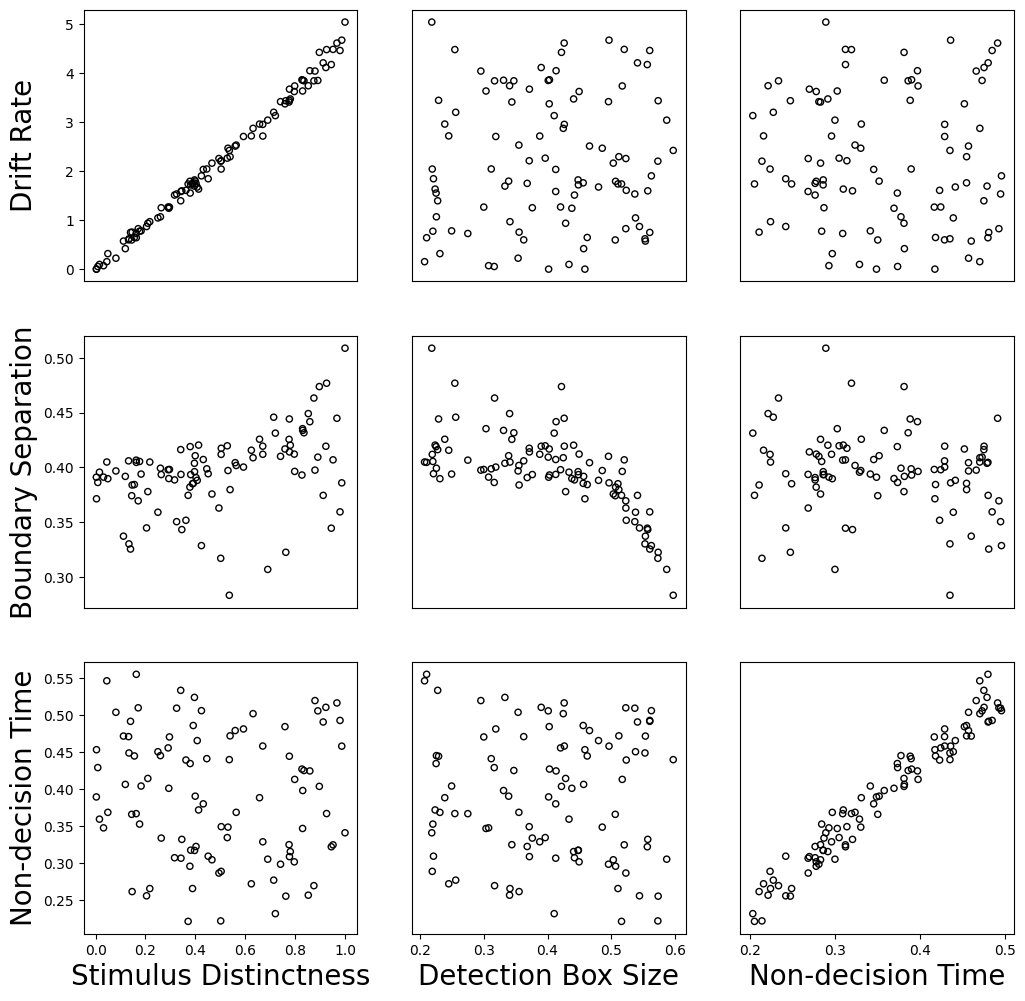

In [12]:
# bns 2000 bs 500 drift rate 0-6 dx = 0.001, dt = 0.001
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(12,12))

In [13]:
valid_trials

[1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000]

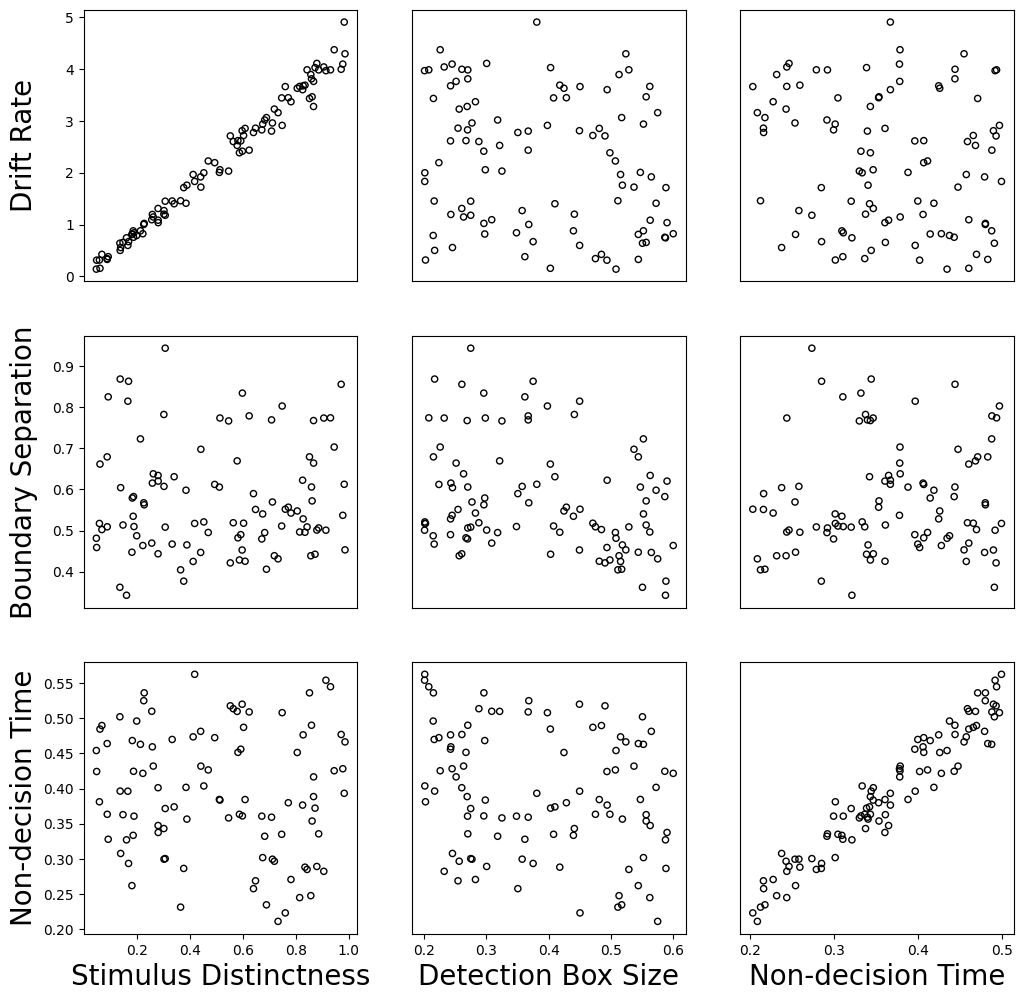

In [75]:
# bns 1500 bs 500 drift rate 0-6 dx = 0.001, dt = 0.001
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(12,12))

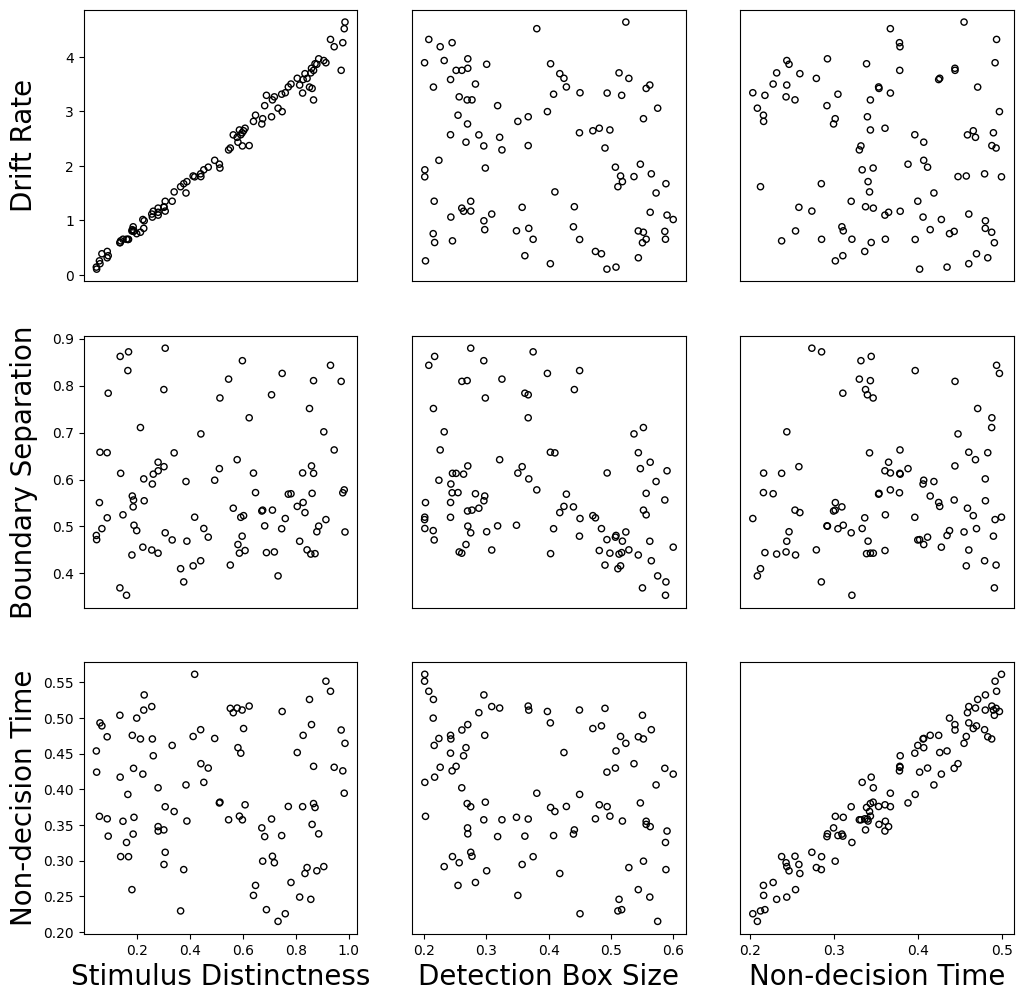

In [73]:
# bns 1500 bs 500 drift rate 0-6 dx = 0.01, dt = 0.001
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(12,12))

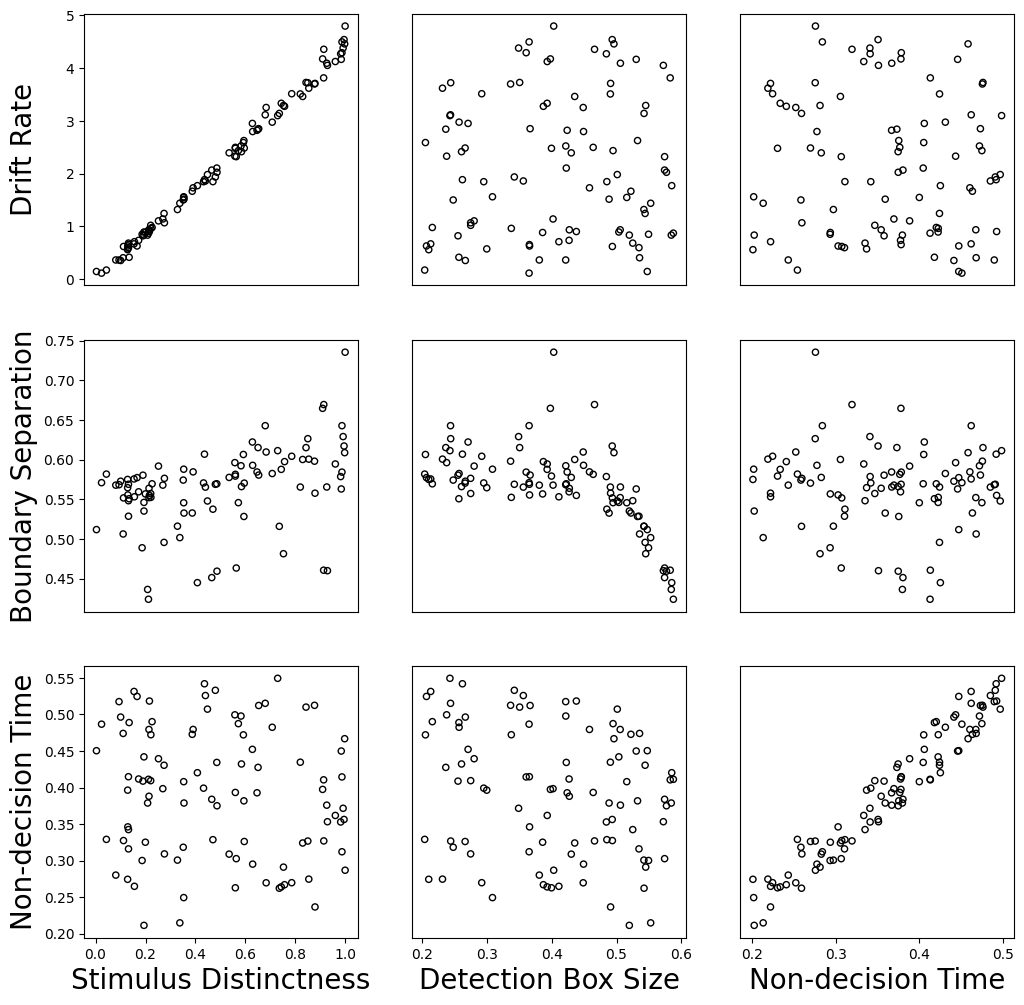

In [62]:
# bns 1500 bs 700  drift rate 0-6 dx = 0.01, dt = 0.001
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(12,12))

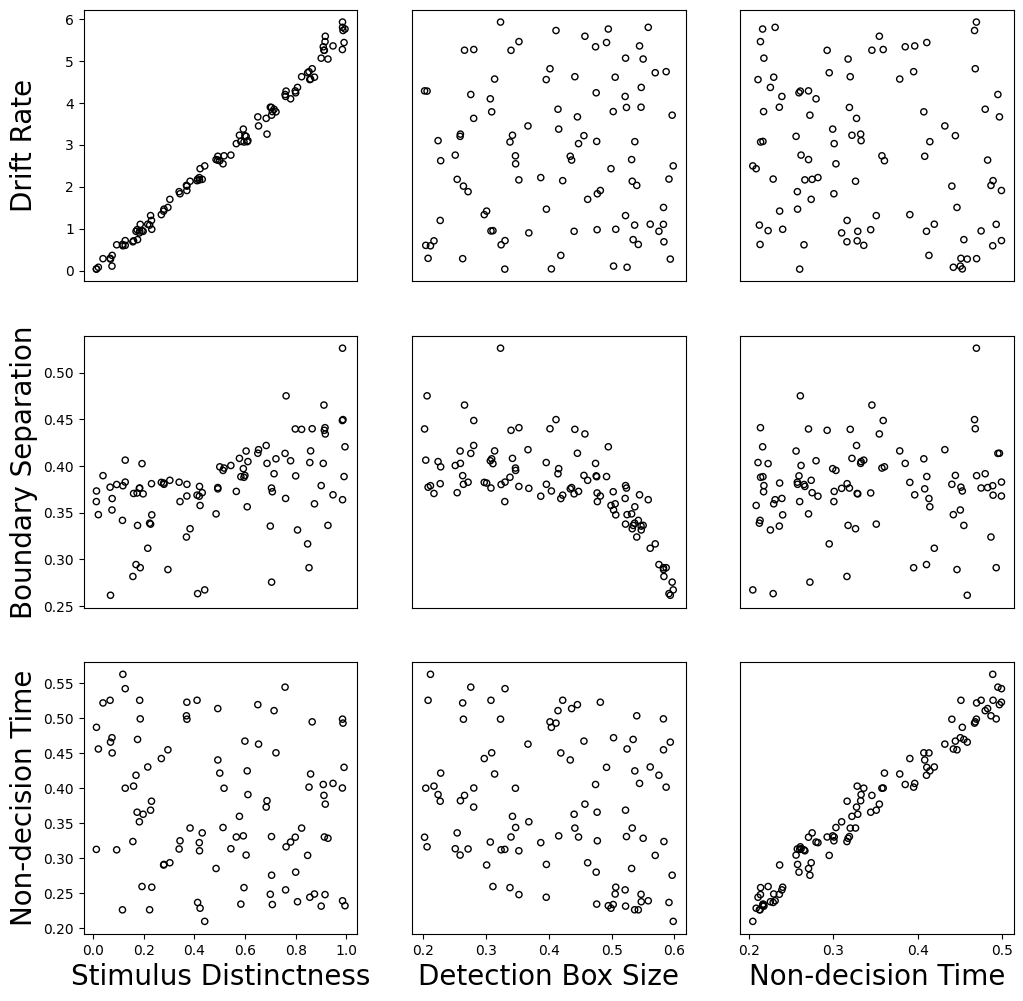

In [40]:
# bns 2000 bs 600  drift rate 0-6 dx = 0.01, dt = 0.001
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(12,12))

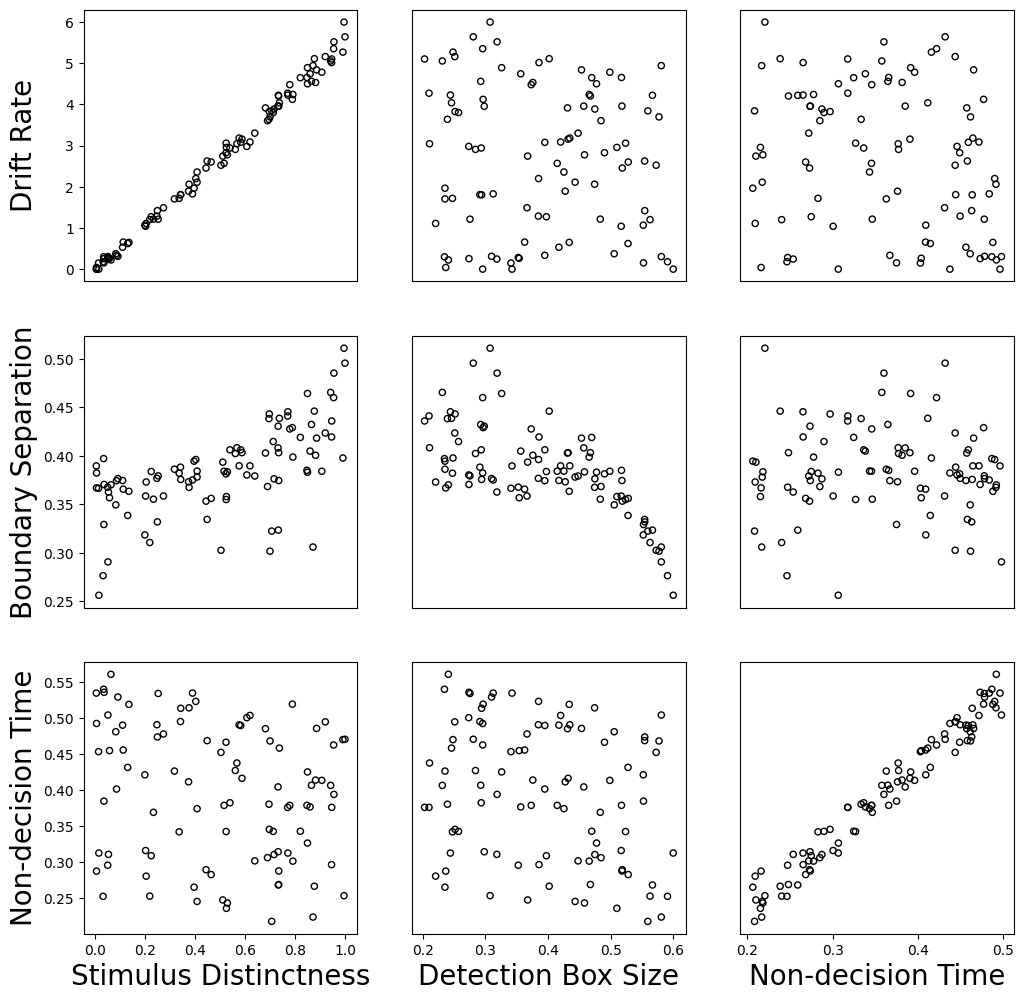

In [35]:
# bns 2000 bs 600  drift rate 0-6
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(12,12))

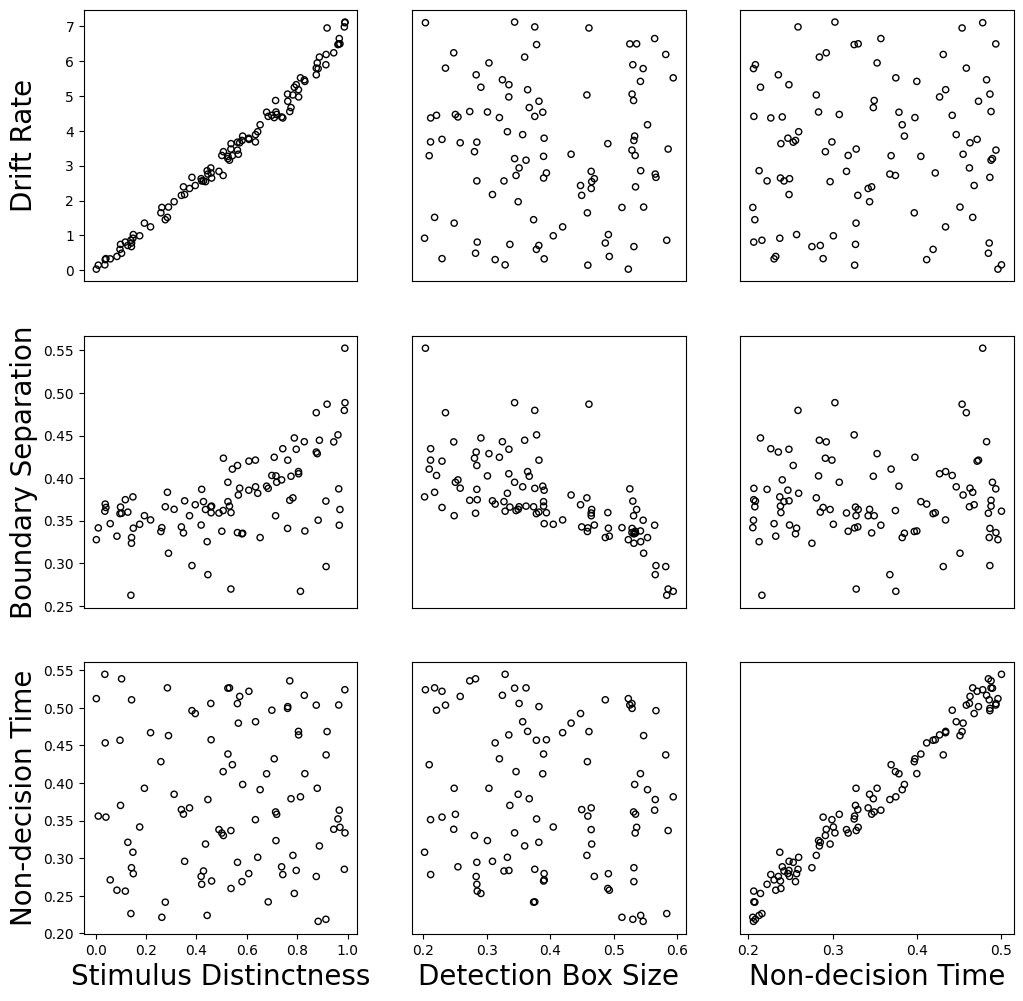

In [21]:
# bns 2000 bs 700 num_sim = 100, drift rate 0-8
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize = 20, s = 20, figsize=(12,12))

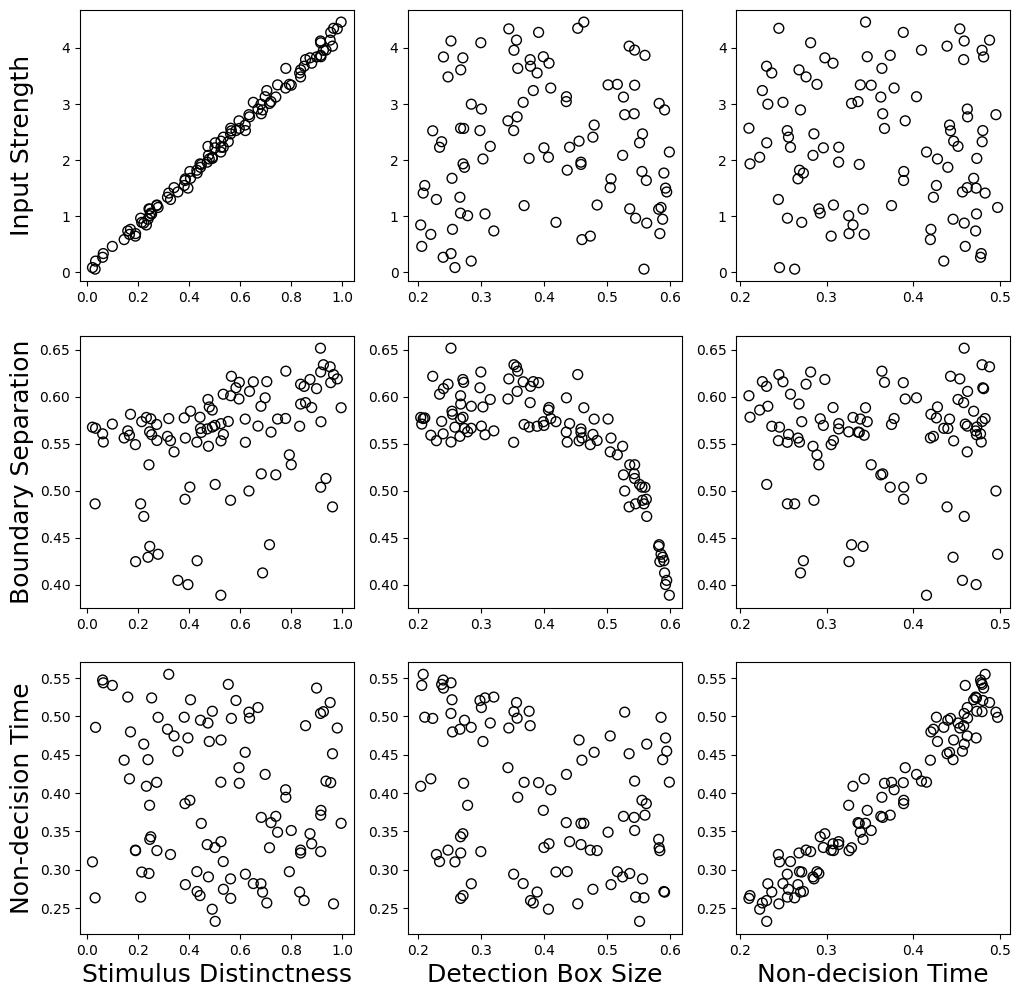

In [200]:
# bns 1500 bs 500 num_sim = 100
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 50, figsize=(12,12))

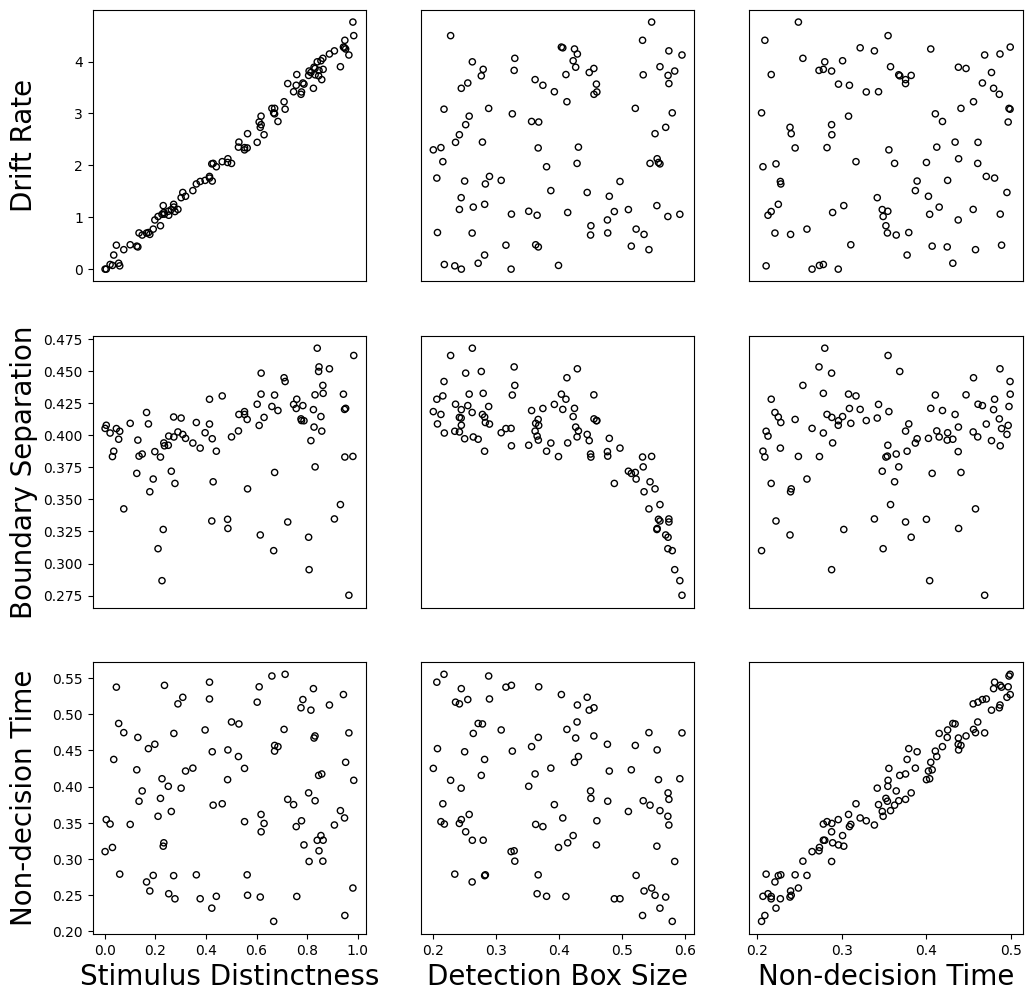

In [21]:
# bns 2000 bs 500
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 fontsize=20, s = 20, figsize=(12,12))

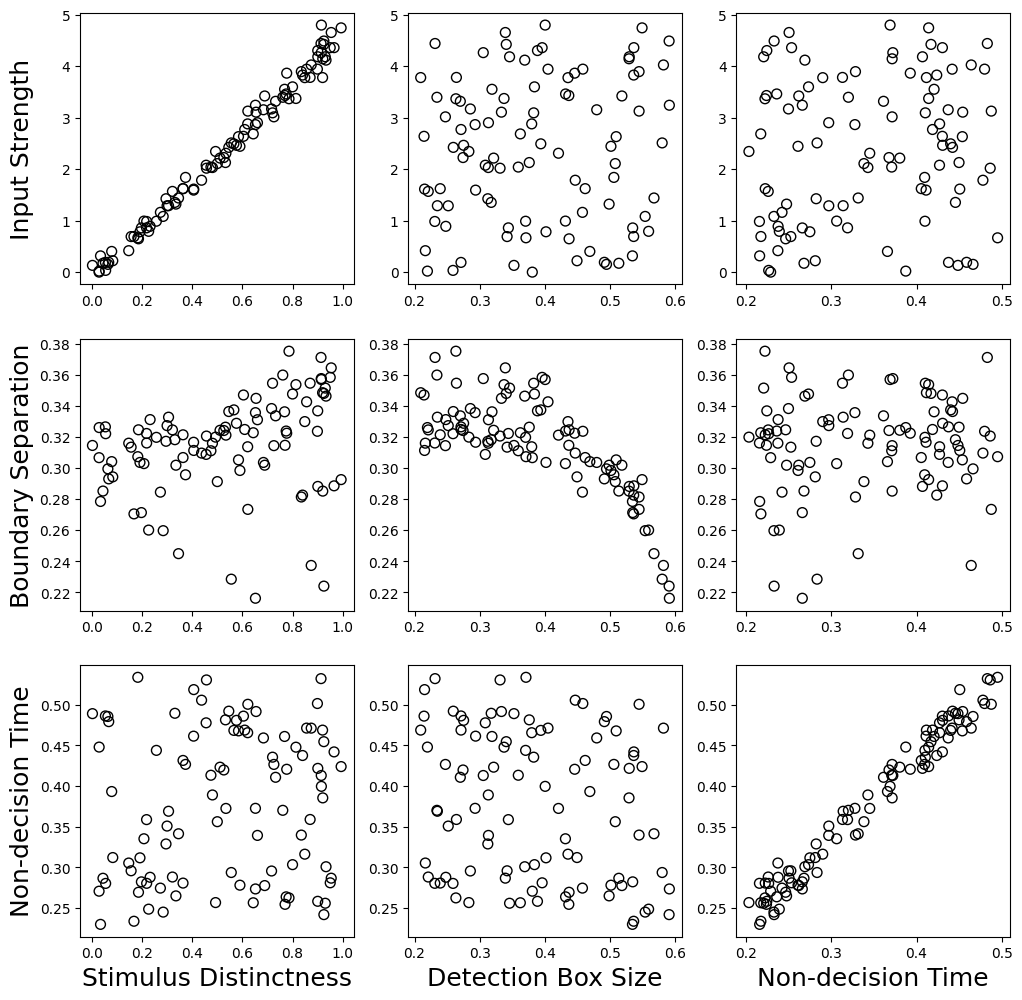

In [176]:
# bns=2500 bs=500
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Drift Rate","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 50, figsize=(12,12))

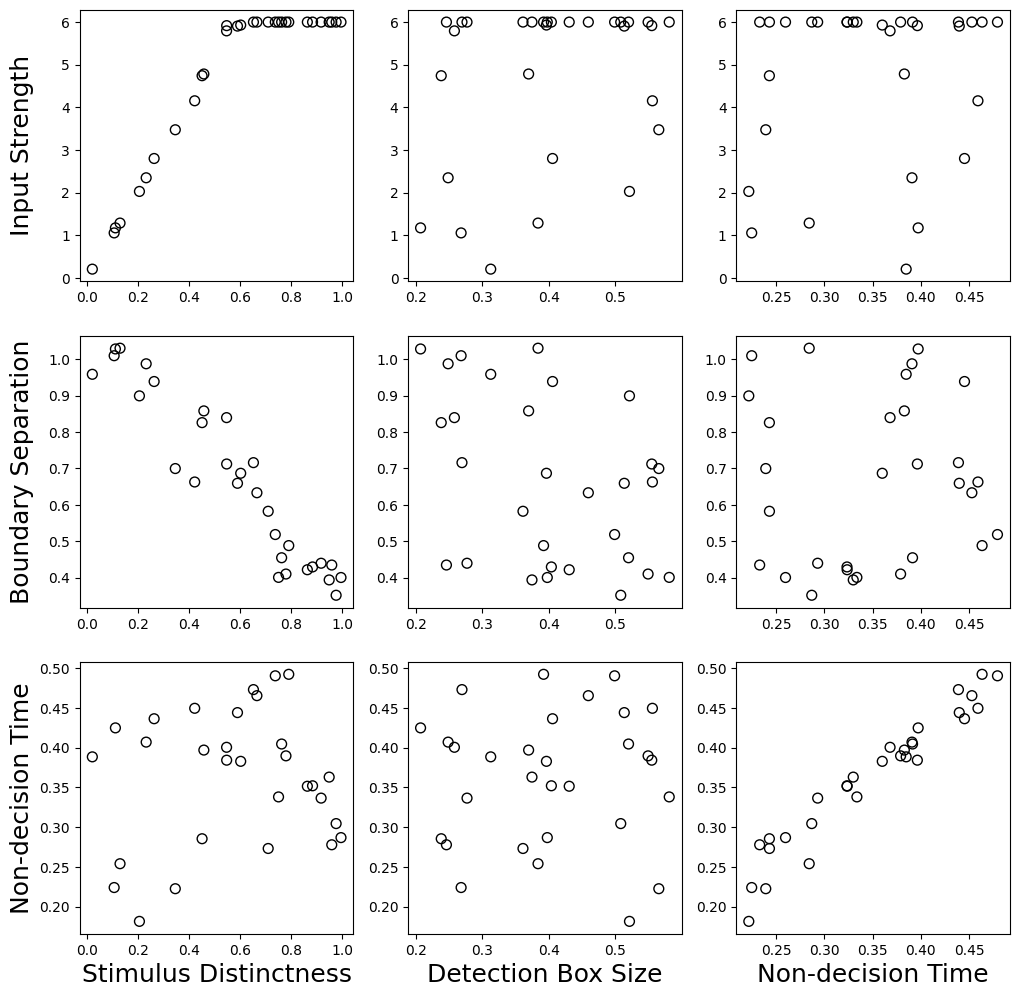

In [162]:
# bns=0 bs=1500
par_labels = ["Stimulus Distinctness", "Detection Box Size", "Non-decision Time"]
par_fitted_labels = ["Input Strength","Boundary Separation","Non-decision Time"]
sim_fit_plot_all(param_IDM[:,0:3], par_fitted[:,:], par_labels, par_fitted_labels, 
                 s = 50, figsize=(12,12))